In [44]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
import numpy as np
from src.models import lstm, tcn
from src.utils import auxiliary_plots, metrics
from src.utils.print_functions import notify_slack
from src.preprocessing import normalization, data_generation
import itertools
import pandas as pd
import matplotlib.pyplot as plt
#device='cuda'
import time

# load Model(s)

In [36]:
m0 = tf.keras.models.load_model('./models/best-model-bs-100-ph-288-seed-0-12-23_11-55-27.ckpt/')
m1 = tf.keras.models.load_model('./models/best-model-bs-100-ph-288-seed-1-12-23_15-15-34.ckpt/')
m2 = tf.keras.models.load_model('./models/best-model-bs-100-ph-288-seed-2-12-23_18-35-37.ckpt/')
m3 = tf.keras.models.load_model('./models/best-model-bs-100-ph-288-seed-3-12-23_21-55-43.ckpt/')
m4 = tf.keras.models.load_model('./models/best-model-bs-100-ph-288-seed-4-12-24_01-15-38.ckpt/')
m5 = tf.keras.models.load_model('../files/models/best-model-bs-100-ph-288-seed-0-12-30_23-40-42.ckpt/')
m6 = tf.keras.models.load_model('../files/models/best-model-bs-100-ph-288-seed-1-12-31_02-13-58.ckpt/')
m7 = tf.keras.models.load_model('../files/models/best-model-bs-100-ph-288-seed-2-12-31_04-47-02.ckpt/')
m8 = tf.keras.models.load_model('../files/models/best-model-bs-100-ph-288-seed-3-12-31_07-19-59.ckpt/')
m9 = tf.keras.models.load_model('../files/models/best-model-bs-100-ph-288-seed-4-12-31_09-53-09.ckpt/')
m10 = tf.keras.models.load_model('../files/models/best-model-bs-100-ph-288-seed-5-12-31_12-26-40.ckpt/')
m11 = tf.keras.models.load_model('../files/models/best-model-bs-100-ph-288-seed-6-12-31_14-59-48.ckpt/')
m12 = tf.keras.models.load_model('../files/models/best-model-bs-100-ph-288-seed-7-12-31_17-33-06.ckpt/')
m13 = tf.keras.models.load_model('../files/models/best-model-bs-100-ph-288-seed-8-12-31_20-06-05.ckpt/')
m14 = tf.keras.models.load_model('../files/models/best-model-bs-100-ph-288-seed-9-12-31_22-39-15.ckpt/')


m = m4

In [34]:
norm_params = {'mean': 28505.41, 'std': 4596.946, 'max': 41217.0, 'min': 17714.0}
batch_size=128
past_history = 288
forecast_horizon = 24

test_file_name='data/hourly_20140102_20191101_test.csv'

# Read test data file
with open(test_file_name, 'r') as datafile:
    ts_test = datafile.readlines()[1:]  # skip the header
    ts_test = np.asarray([np.asarray(l.rstrip().split(',')[0], dtype=np.float32) for l in ts_test])
    ts_test = np.reshape(ts_test, (ts_test.shape[0],))

# Normalize training data
#norm_params = normalization.get_normalization_params(ts_train)
# Normalize test data with train params
ts_test = normalization.normalize(ts_test, norm_params)

x_test, y_test = data_generation.univariate_data(ts_test, 0, ts_test.shape[0], past_history, forecast_horizon)
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

x = next(iter(test_data))[0]
y = next(iter(test_data))[1]
def get_wape_score(m):
    test_forecast = m.predict(test_data)
    test_forecast = normalization.denormalize(test_forecast, norm_params)
    y_test_denormalized = normalization.denormalize(y_test, norm_params)
    x_test_denormalized = normalization.denormalize(x_test, norm_params)
    test_metrics = metrics.evaluate(y_test_denormalized, test_forecast, ['wape'])
    return test_metrics

In [22]:
print(get_wape_score(m0))
print(get_wape_score(m1))
print(get_wape_score(m2))
print(get_wape_score(m3))
print(get_wape_score(m4))

 68/477 [===>..........................] - ETA: 1:10

KeyboardInterrupt: 

In [4]:
print(get_wape_score(m5))
print(get_wape_score(m6))
print(get_wape_score(m7))

477/477 [==============================] - 83s 173ms/step
{'wape': 0.009016795}
477/477 [==============================] - 80s 167ms/step
{'wape': 0.009316369}
477/477 [==============================] - 79s 165ms/step
{'wape': 0.009229918}


In [18]:
print(get_wape_score(m8))
print(get_wape_score(m9))
print(get_wape_score(m10))
print(get_wape_score(m11))
print(get_wape_score(m12))
print(get_wape_score(m13))
print(get_wape_score(m14))

477/477 [==============================] - 82s 171ms/step
{'wape': 0.0092689525}
477/477 [==============================] - 80s 168ms/step
{'wape': 0.008943631}
477/477 [==============================] - 80s 167ms/step
{'wape': 0.00889557}
477/477 [==============================] - 81s 169ms/step
{'wape': 0.008941359}
477/477 [==============================] - 83s 174ms/step
{'wape': 0.008990177}
477/477 [==============================] - 78s 164ms/step
{'wape': 0.009330218}
477/477 [==============================] - 80s 167ms/step
{'wape': 0.008851857}


In [23]:
#input_data = np.random.rand(1, 144, 1)  # Adjust the shape according to your model's input shape

preds = m0.predict(x)

NameError: name 'x' is not defined

In [5]:
preds

array([[-0.29723772, -0.34863508, -0.39812145, ..., -0.8714379 ,
        -0.8847275 , -0.9112977 ],
       [-0.359432  , -0.4082173 , -0.44687063, ..., -0.87513536,
        -0.8827412 , -0.902106  ],
       [-0.403988  , -0.44797742, -0.49436417, ..., -0.8822082 ,
        -0.8863403 , -0.8965936 ],
       ...,
       [ 1.1861186 ,  1.0818068 ,  0.96467054, ..., -0.35889238,
        -0.40780967, -0.46157187],
       [ 1.082237  ,  0.97978103,  0.8725916 , ..., -0.43479505,
        -0.4770444 , -0.5269758 ],
       [ 0.95158654,  0.84452   ,  0.73486674, ..., -0.4895477 ,
        -0.5313225 , -0.582414  ]], dtype=float32)

In [6]:
import matplotlib.pyplot as plt

In [45]:
def plot_forecast(x,y,preds,i, aa=None):
    x_and_y = tf.concat((x[i], tf.expand_dims(y[i], -1)), axis=0)
    x_and_preds = tf.concat((x[i], tf.expand_dims(preds[i], -1)), axis=0)
    plt.plot(normalization.denormalize(x_and_y, norm_params), color='b')
    plt.plot(normalization.denormalize(x_and_preds, norm_params), color='r')
    if aa is not None: plt.plot(normalization.denormalize(aa[i], norm_params), color='pink')
    plt.plot(normalization.denormalize(x[i], norm_params), color='g')
    plt.vlines(288, ymin=20000, ymax=35000, color='black', linestyles='--')
i=60
plot_forecast(x,y,preds,i, aa=x)

NameError: name 'preds' is not defined

# AA with Foolbox

In [19]:
import foolbox as fb
import foolbox.attacks as fba

In [20]:
fmodel = fb.TensorFlowModel(m, bounds=(-2.3329546, 2.7530992))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [21]:
attack = fba.PGD()

In [22]:
m.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 288, 1)]          0         
                                                                 
 tcn (TCN)                   (None, 128)               1881600   
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
Total params: 1885296 (7.19 MB)
Trainable params: 1880176 (7.17 MB)
Non-trainable params: 5120 (20.00 KB)
_________________________________________________________________


In [26]:
attack(fmodel, x_test, np.zeros((61032,24,1)), epsilons=.1)

NotImplementedError: 

In [13]:

METRICS = ['wape','mse', 'rmse', 'nrmse', 'mae', 'mpe', 'mape', 'mdape', 'smape', 'smdape',
           'mase', 'rmspe', 'rmsse', 'mre', 'rae', 'mrae', 'std_ae', 'std_ape']

In [14]:
test_forecast = m.predict(test_data)

test_forecast = normalization.denormalize(test_forecast, norm_params)
y_test_denormalized = normalization.denormalize(y_test, norm_params)
x_test_denormalized = normalization.denormalize(x_test, norm_params)

test_metrics = metrics.evaluate(y_test_denormalized, test_forecast, METRICS)
print('Test scores', test_metrics)

# Plot some test predictions

477/477 [==============================] - 18s 37ms/step
Test scores {'wape': 0.009558055, 'mse': 153463.19, 'rmse': 391.74377, 'nrmse': 0.017635789, 'mae': 272.71762, 'mpe': 0.0011282996, 'mape': 0.009665206, 'mdape': 0.0071450276, 'smape': 0.9691143408417702, 'smdape': 0.007146104, 'mase': 1.1727442, 'rmspe': 0.013967687, 'rmsse': 1.684582, 'mre': 0.009665206, 'rae': 0.07140458022532852, 'mrae': 3851272700.0, 'std_ae': 2254.5204022811763, 'std_ape': 0.08000595839886751}


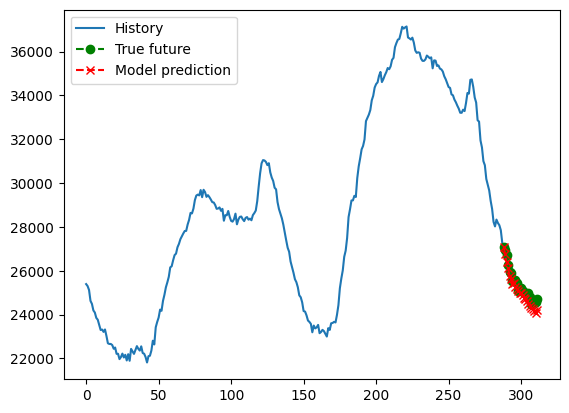

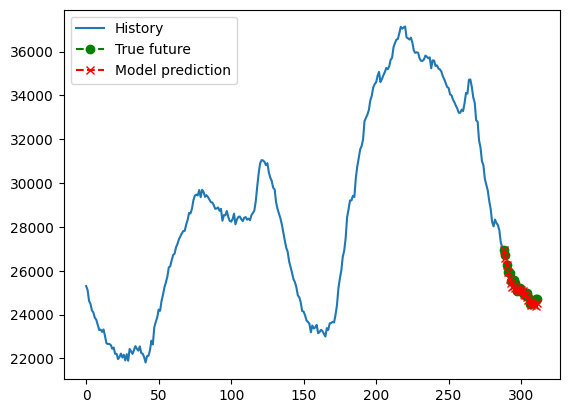

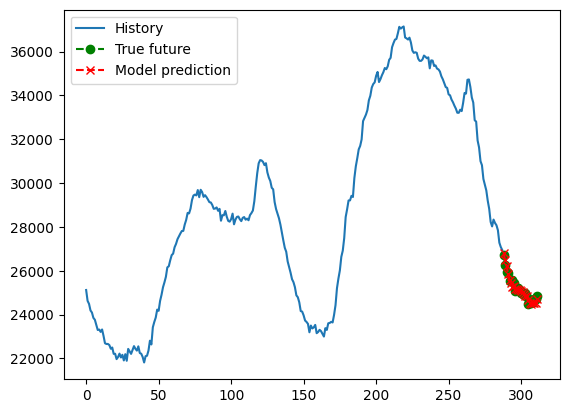

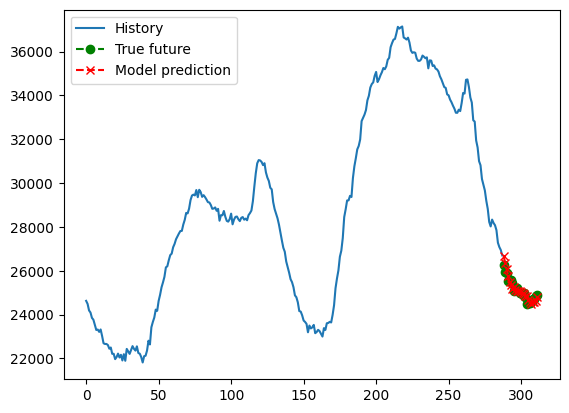

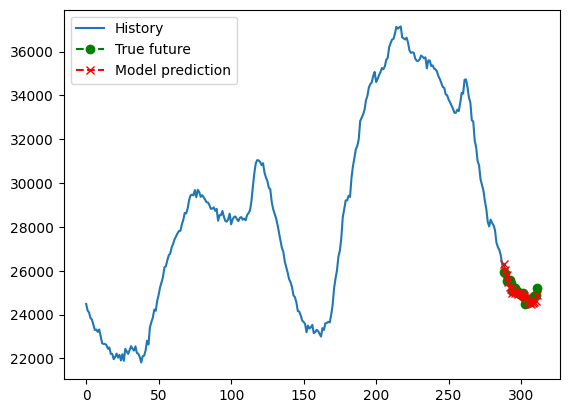

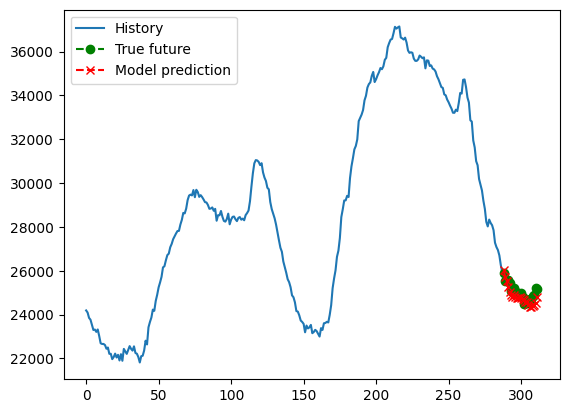

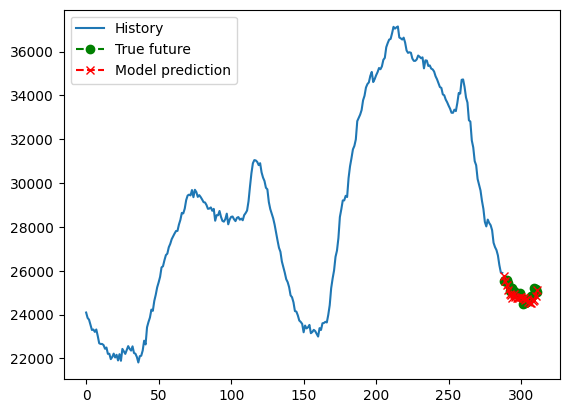

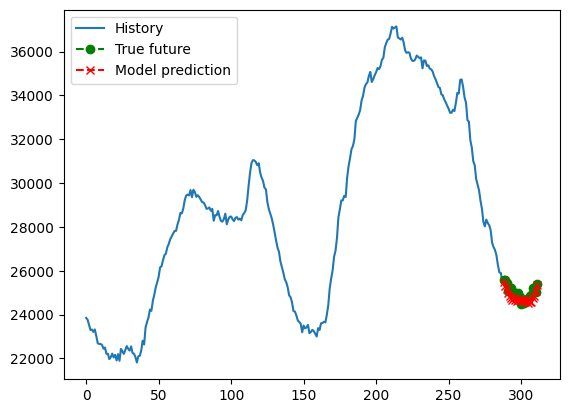

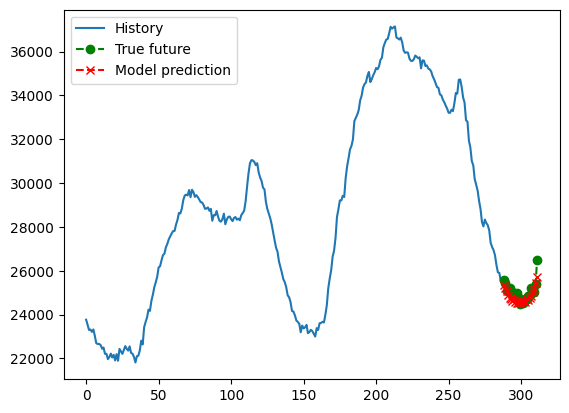

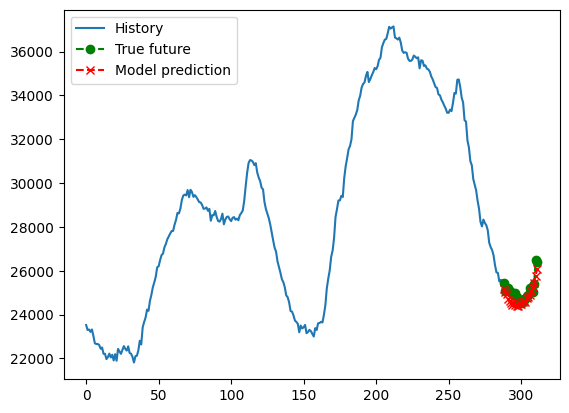

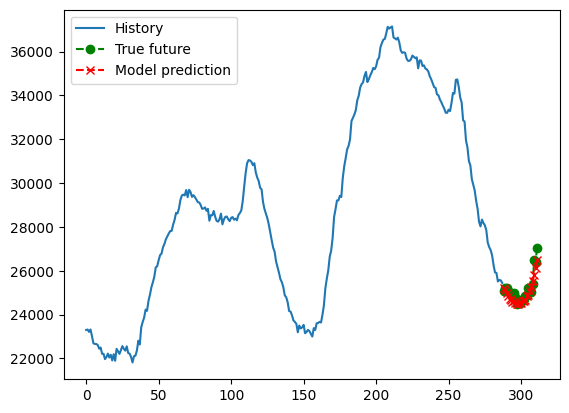

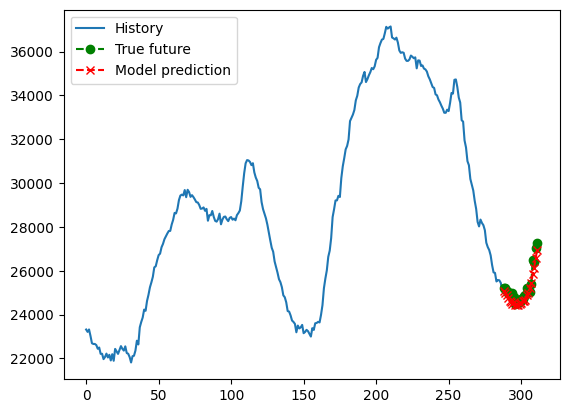

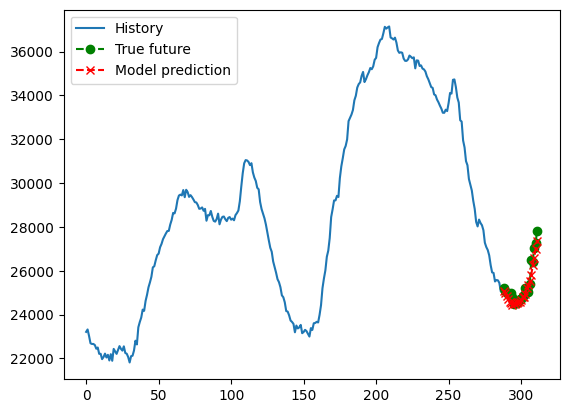

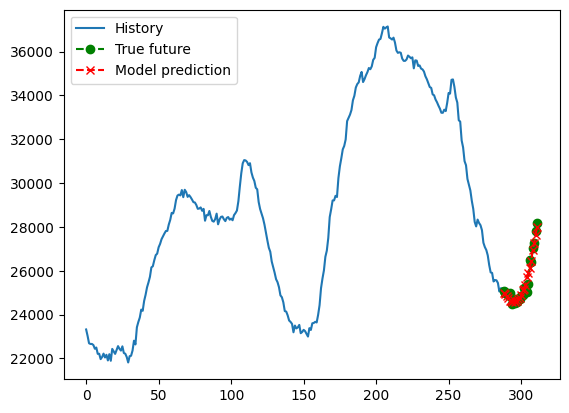

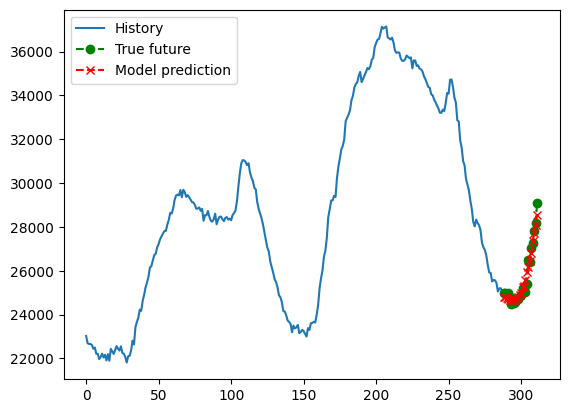

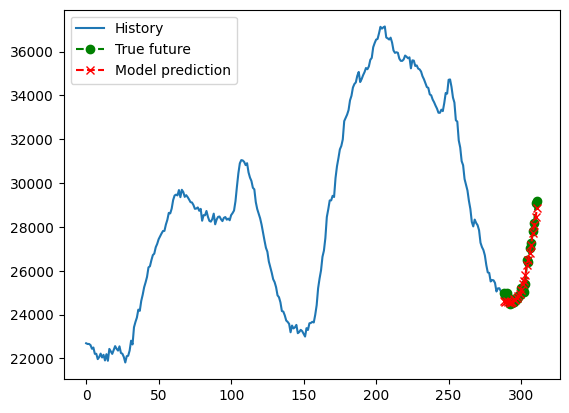

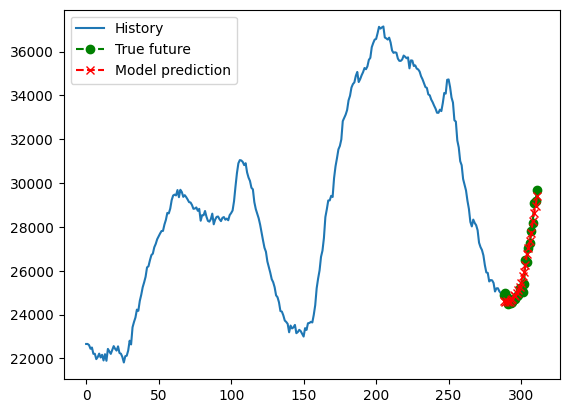

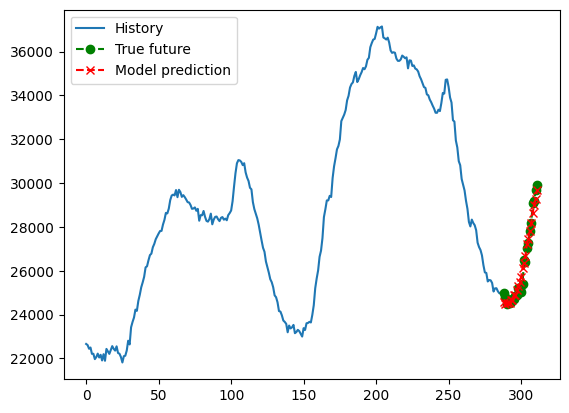

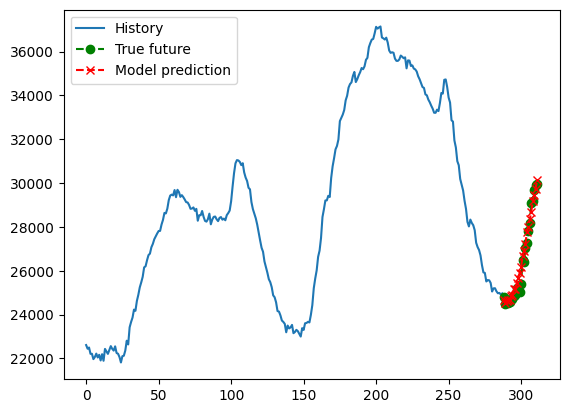

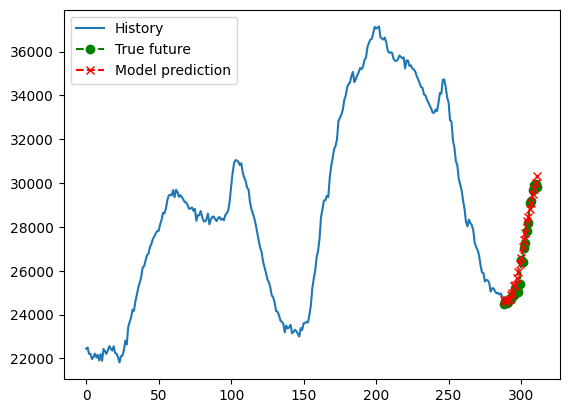

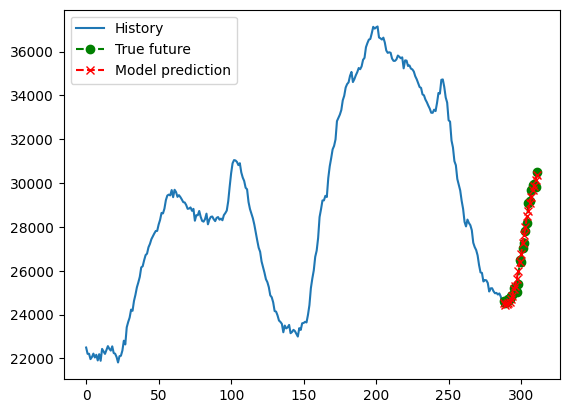

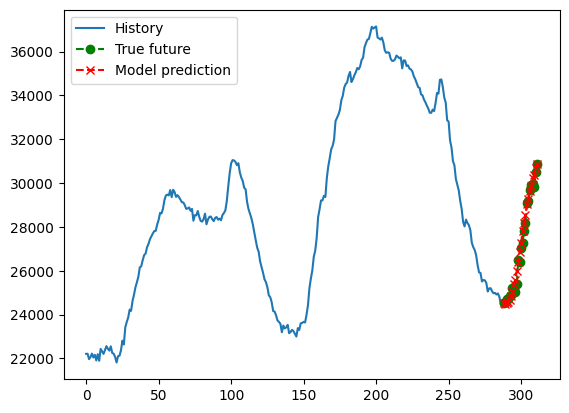

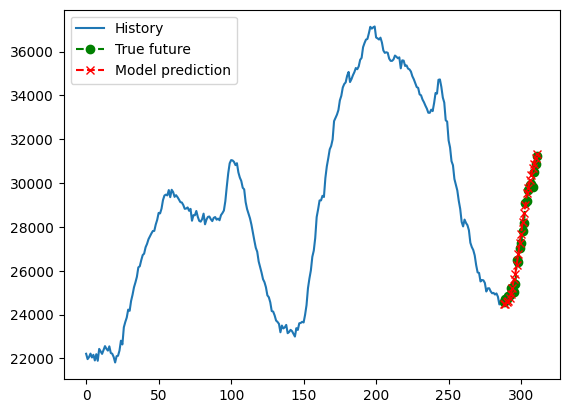

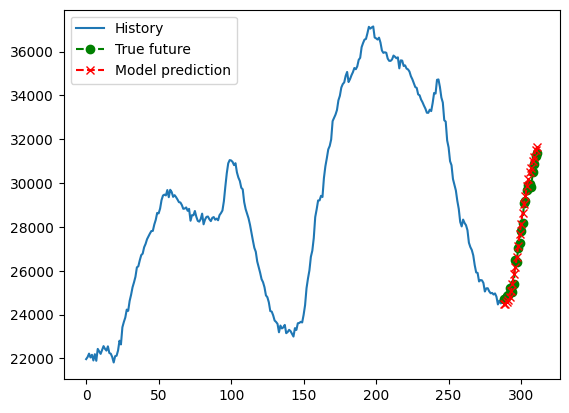

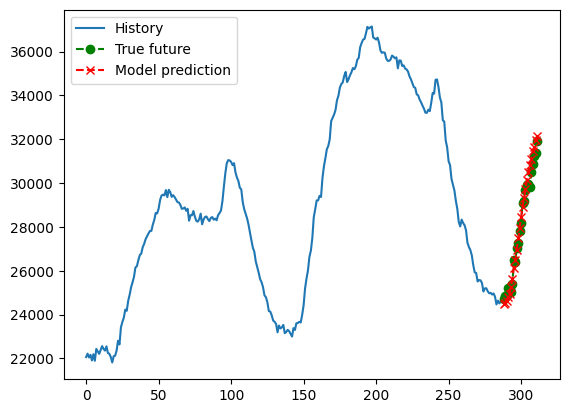

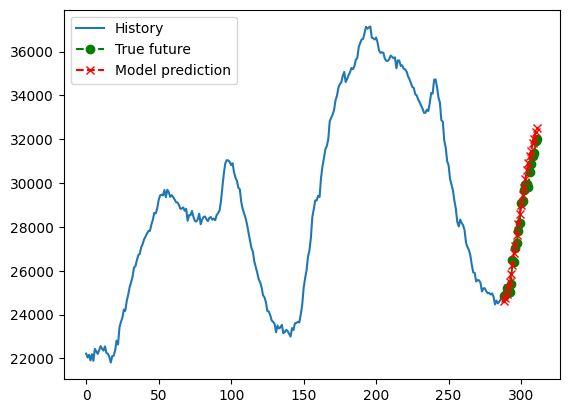

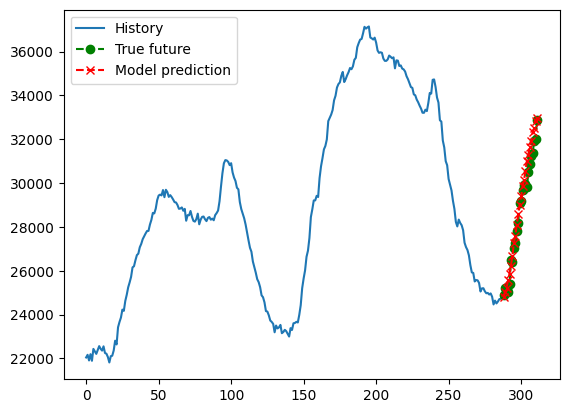

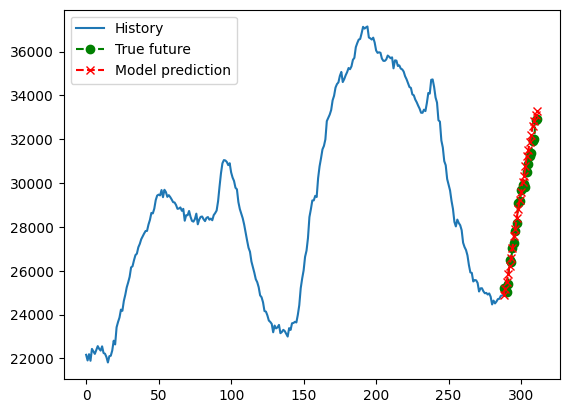

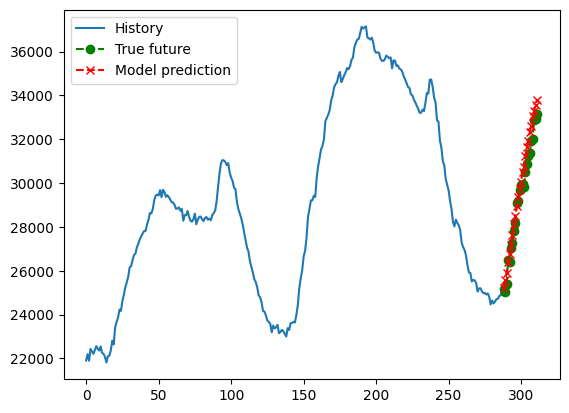

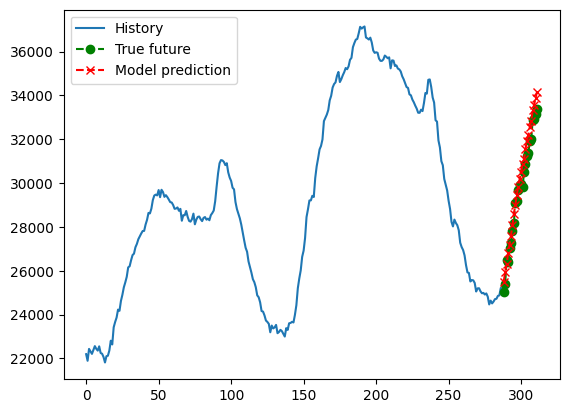

In [27]:
auxiliary_plots.plot_ts_forecasts(x_test_denormalized, y_test_denormalized, test_forecast, num_plots=30)

# manual adversarial example

In [15]:
loss_object = tf.keras.losses.MeanAbsoluteError()
def create_adversarial_pattern(model, input, label):
  with tf.GradientTape() as tape:
    tape.watch(input)
    prediction = model(input)
    loss = loss_object(label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad
    

In [53]:
import tensorflow as tf

loss_object = tf.keras.losses.MeanAbsoluteError()

def linf_attack(m, x, y, alpha=0.001, epsilon=100, iterations=100):
    adv_input = tf.identity(x)  # Create a copy of the input to apply perturbations
    denorm_input = normalization.denormalize(x, norm_params)
    for _ in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(adv_input)
            # Forward pass to get the model's prediction on the adversarial input
            prediction = m(adv_input)
            # Calculate the loss between the true label and the model's prediction
            loss = loss_object(y, prediction)
        # Get the gradients of the loss with respect to the adversarial input
        gradient = tape.gradient(loss, adv_input)
        # Get the sign of the gradients and scale by epsilon
        perturbation = alpha * tf.sign(gradient)
        # Update the adversarial input by adding the perturbation
        adv_input = adv_input + perturbation
        # Project the adversarial input back into the epsilon-ball
        denorm_adv_input = normalization.denormalize(adv_input, norm_params)        
        denorm_adv_input = tf.clip_by_value(denorm_adv_input, denorm_input - epsilon, denorm_input + epsilon)
        adv_input = normalization.normalize(denorm_adv_input, norm_params)
    mae, avg_mae = calc_denormalized_mae(m, x, x+perturbation)
    
    perturbation = adv_input - x
    return perturbation

In [67]:
pert = linf_attack(m,tf.convert_to_tensor(x), tf.convert_to_tensor(y), alpha=3)

4/4 [==============================] - 0s 66ms/step


In [70]:
adv_ex = x + pert
adv_ex
clean_preds = m.predict(x)
adv_preds = m.predict(adv_ex)

4/4 [==============================] - 0s 59ms/step


In [71]:
def calc_denormalized_mae(m, x, advs):
    y_hat_adv = m.predict(advs)
    y_hat = m.predict(x)
    denormalized_y_hat_adv = normalization.denormalize(y_hat_adv, norm_params)
    denormalized_y_hat = normalization.denormalize(y_hat,norm_params)
    return tf.keras.losses.mean_absolute_error(denormalized_y_hat_adv,denormalized_y_hat), tf.reduce_sum(tf.keras.losses.mean_absolute_error(denormalized_y_hat_adv,denormalized_y_hat))/len(denormalized_y_hat)

In [72]:
calc_denormalized_mae(m, x, x+pert)

4/4 [==============================] - 0s 65ms/step


(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 261.01855,  286.4821 ,  272.11353,  262.61108,  283.00342,
         384.80624,  665.7856 ,  197.15193,  374.52222,  364.9965 ,
         189.64722,  874.0722 ,  260.90073,  742.8543 , 1350.0988 ,
        1620.0645 , 1685.1119 ,  438.6039 ,  473.89648, 2046.311  ,
         455.30624, 1233.567  , 2184.5461 , 2490.142  , 1332.9867 ,
         728.63153, 1443.18   , 2412.5977 ,  406.25156,  801.1594 ,
        2283.0935 , 1178.0089 ,  583.5161 ,  631.45685,  690.52026,
        1493.546  ,  471.91245,  681.3293 ,  722.51984,  729.96094,
         666.95776,  606.79266,  678.9954 ,  564.72876,  704.1553 ,
         628.8841 ,  471.88086,  470.70508,  389.24252,  606.70044,
         500.79233,  516.3455 ,  559.4712 ,  232.76611,  446.6289 ,
         486.16943,  413.88394,  431.77393,  755.9797 ,  519.2529 ,
         684.2114 ,  422.2578 ,  377.43295,  430.1898 ,  448.57993,
         452.92188,  425.74692,  352.3856 ,  423.93018,  439.85938,

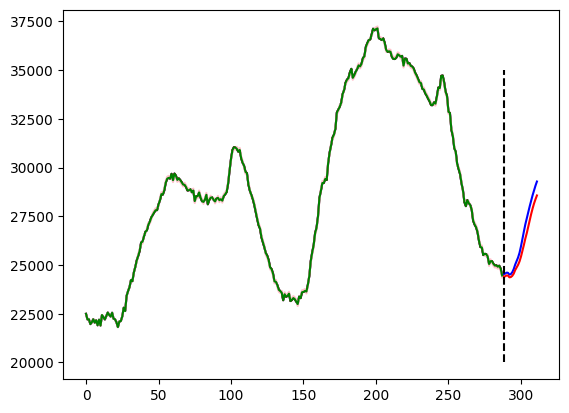

In [73]:
plot_forecast(x,clean_preds,adv_preds,i=20, aa=adv_ex)

# C&W adaption

In [9]:
w = tf.constant(np.linspace(0.5, 1.5, 288), dtype=tf.float32)
w = tf.expand_dims(w, axis=0)  # New shape: (1, 288)
w = tf.tile(w, multiples=[128, 1])  # New shape: (128, 288)
w = tf.expand_dims(w, axis=-1)
w

def loss_fn(x, adv_x,y, prediction, const):
    MAE = tf.keras.losses.MeanAbsoluteError()
    pert = (adv_x - x)#*w
    l2 = tf.norm(pert, ord='euclidean')
    mae = MAE(y, prediction)
    return l2 - const * mae

In [10]:
def l2_attack(x,y, iterations=100, const=6, lr=.03):
    
    adv_input = tf.Variable(tf.zeros_like(x))
    optimizer = tf.keras.optimizers.Adam(lr)
    for i in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(adv_input)
            
            # Forward pass to get the model's prediction on the adversarial input
            prediction = m(adv_input)
            
            # Calculate the loss between the true label and the model's prediction
            
            loss = loss_fn(x,adv_input, y,prediction, const)
            grads = tape.gradient(loss, adv_input)
            optimizer.apply_gradients([(grads, adv_input)])
    return(adv_input)

In [68]:
adv_input = l2_attack(x,y)
adv_preds = m.predict(adv_input)
clean_preds = m.predict(x)

4/4 [==============================] - 0s 11ms/step


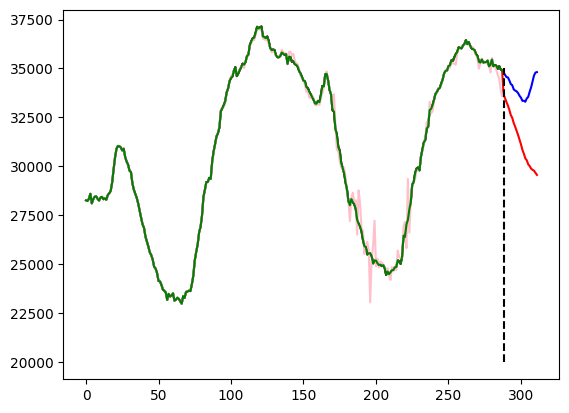

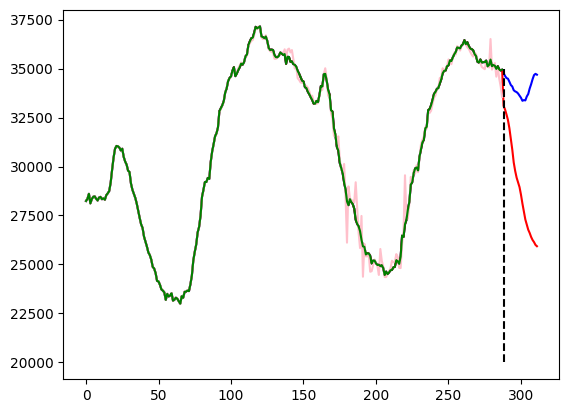

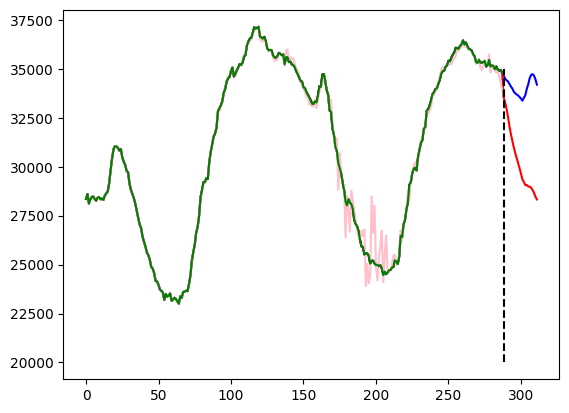

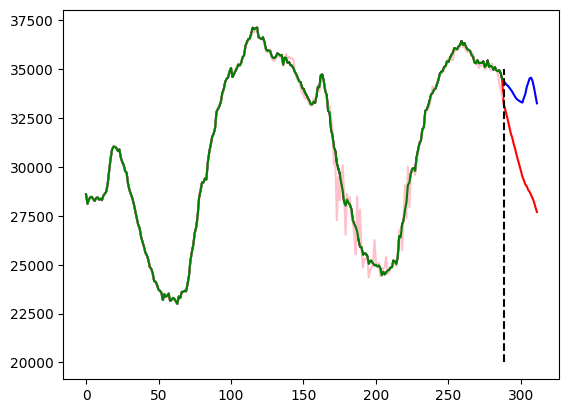

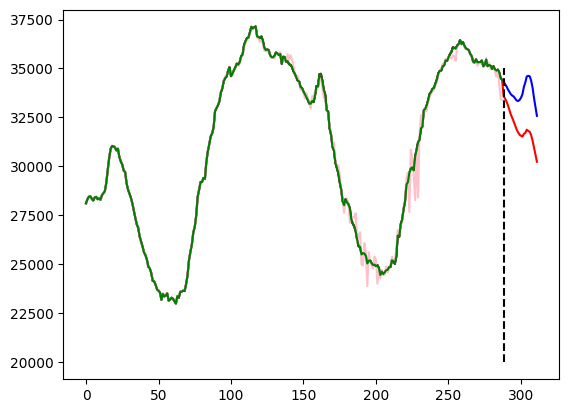

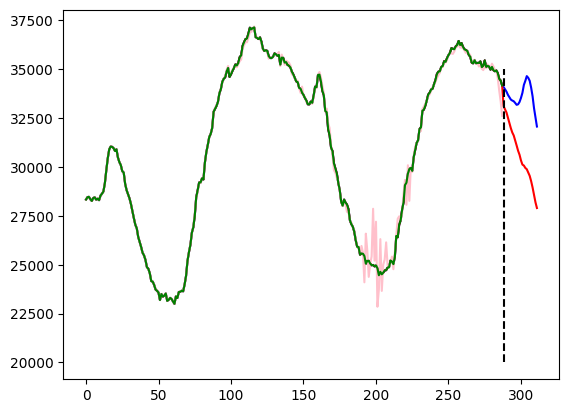

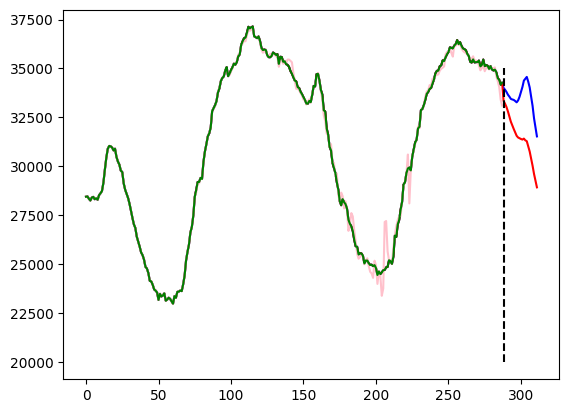

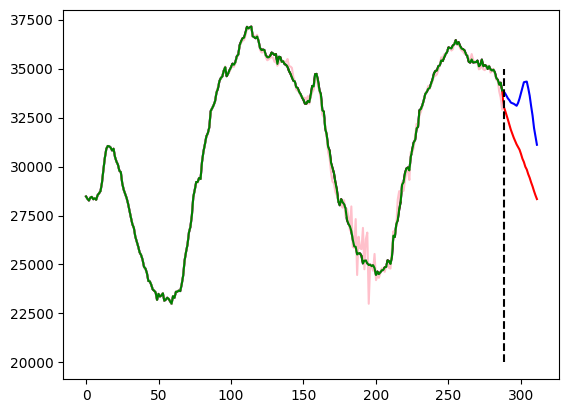

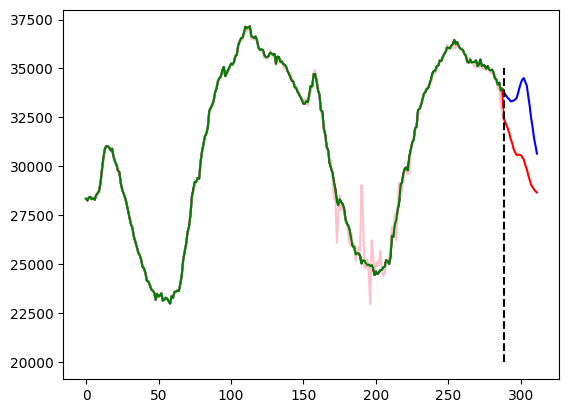

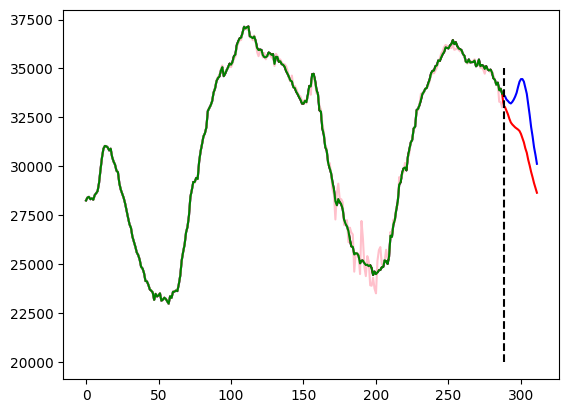

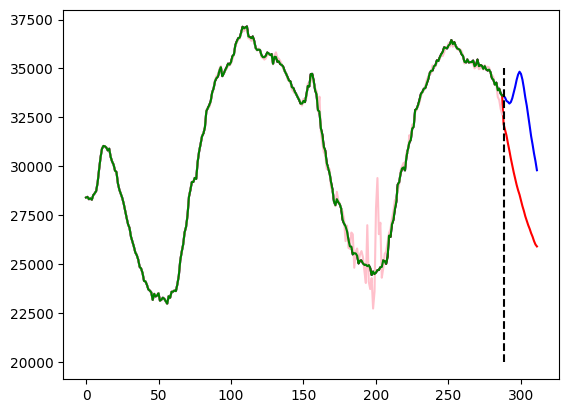

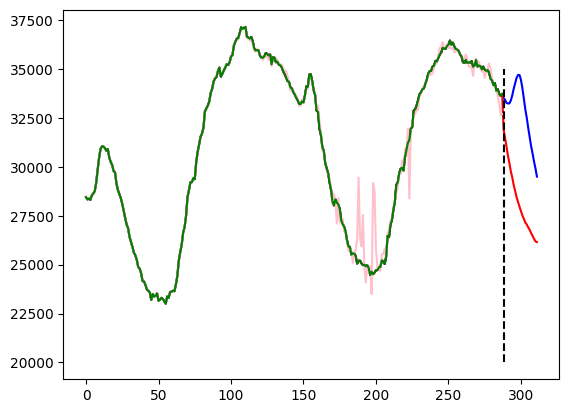

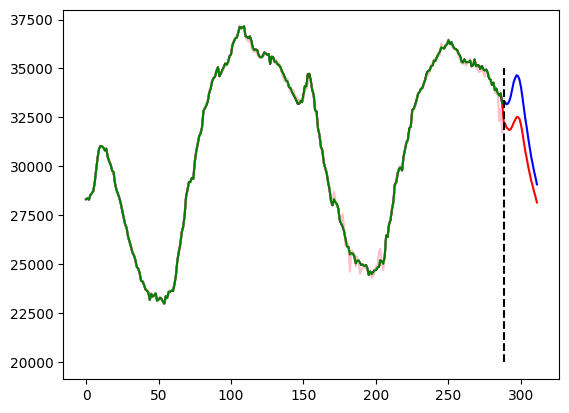

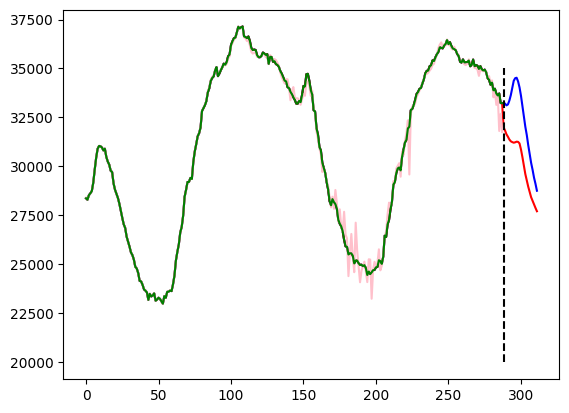

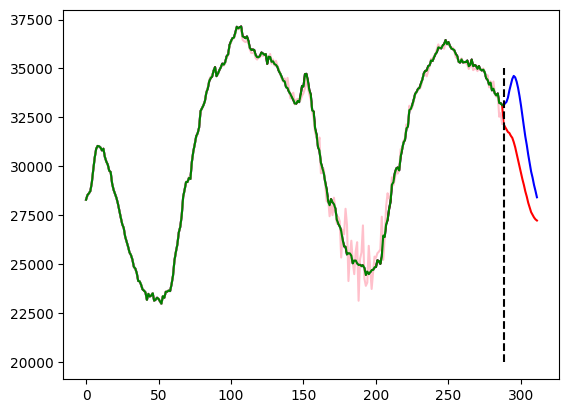

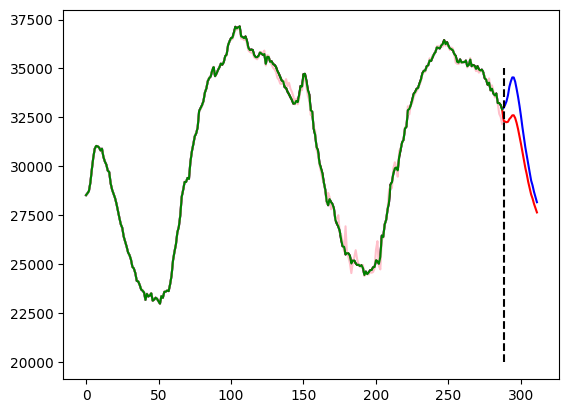

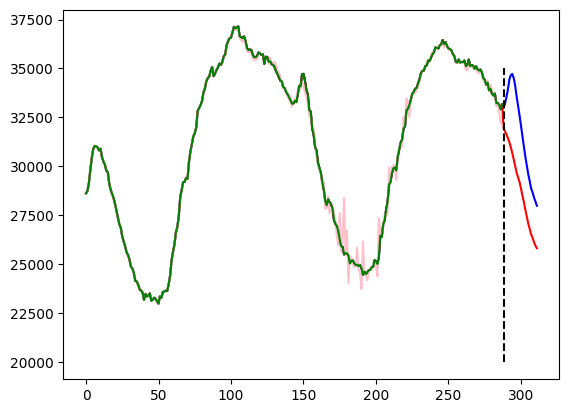

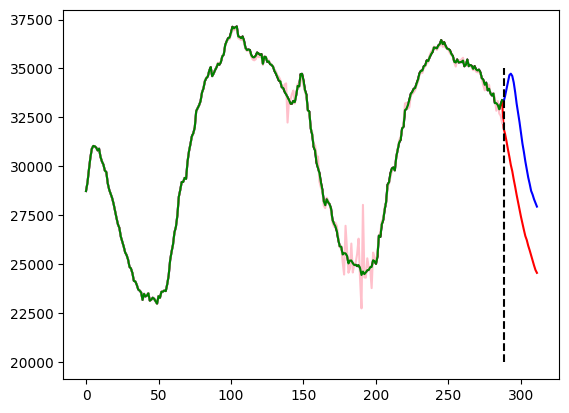

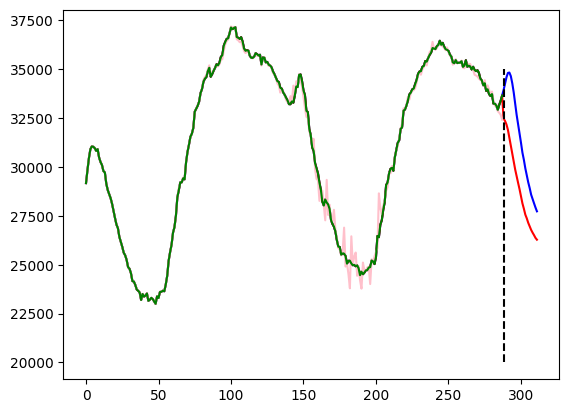

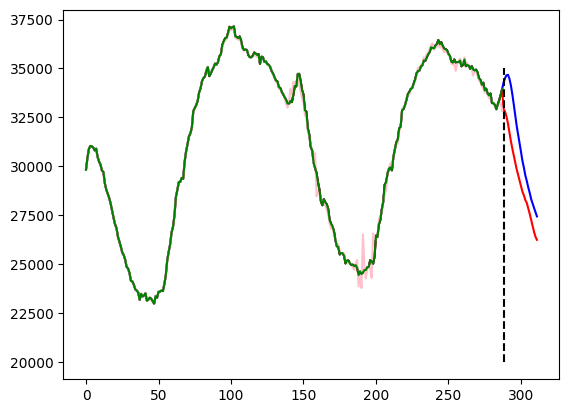

In [101]:
for i in range(100,120):
    plot_forecast(x,clean_preds,adv_preds,i=i, aa=adv_input)
    plt.show()

1/1 [==============================] - 0s 20ms/step


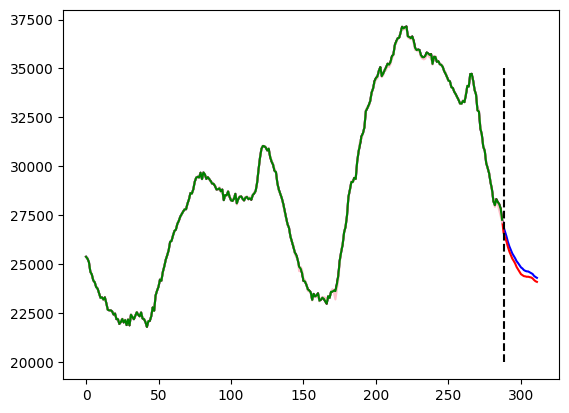

In [27]:
adv_input = l2_attack(x[:20], y[:20], const=1.7)
adv_preds = m.predict(adv_input)
clean_preds = m.predict(x[:20])
plot_forecast(x,clean_preds,adv_preds,i=0, aa=adv_input)

In [28]:
x

<tf.Tensor: shape=(128, 288, 1), dtype=float32, numpy=
array([[[-0.677278  ],
        [-0.6968562 ],
        [-0.73601264],
        ...,
        [-0.09319452],
        [-0.14257513],
        [-0.26678804]],

       [[-0.6968562 ],
        [-0.73601264],
        [-0.84369284],
        ...,
        [-0.14257513],
        [-0.26678804],
        [-0.31007764]],

       [[-0.73601264],
        [-0.84369284],
        [-0.8739303 ],
        ...,
        [-0.26678804],
        [-0.31007764],
        [-0.33922744]],

       ...,

       [[ 0.503506  ],
        [ 0.5224316 ],
        [ 0.43128416],
        ...,
        [ 1.4347765 ],
        [ 1.4019287 ],
        [ 1.279891  ]],

       [[ 0.5224316 ],
        [ 0.43128416],
        [ 0.37994573],
        ...,
        [ 1.4019287 ],
        [ 1.279891  ],
        [ 1.1998379 ]],

       [[ 0.43128416],
        [ 0.37994573],
        [ 0.34622768],
        ...,
        [ 1.279891  ],
        [ 1.1998379 ],
        [ 1.0621378 ]]], dtype=float32)

# L0 Attack

4/4 [==============================] - 0s 11ms/step
288
1.0
287
2.0
286
3.0
285
4.0
284
5.0
283
6.0
282
7.0
281
8.0
280
9.0
279
10.0
278
11.0
277
12.0
276
13.0
275
14.0
274
15.0
273
16.0
272
17.0
271
18.0
270
19.0
269
20.0
268
21.0
267
22.0
266
23.0
265
24.0
264
25.0
263
26.0
262
27.0
261
28.0
260
29.0
259
30.0
258
31.0
257
32.0
256
33.0
255
34.0
254
35.0
253
36.0
252
37.0
251
38.0
250
39.0
249
40.0
248
41.0
247
42.0
246
43.0
245
44.0
244
45.0
243
46.0
242
47.0
241
48.0
240
49.0
239
50.0
238
51.0
237
52.0
236
53.0
235
54.0
234
55.0
233
56.0
232
57.0
231
58.0
nonzeros: 288
4/4 [==============================] - 0s 11ms/step


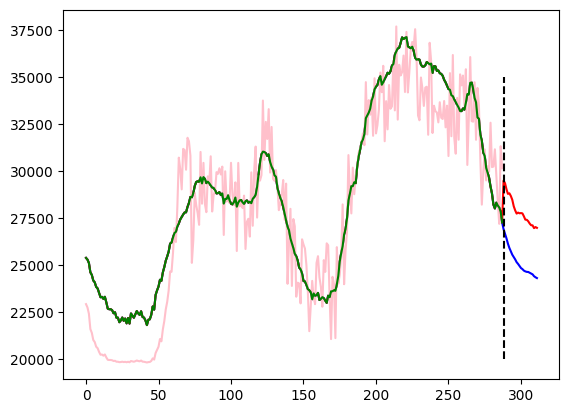

230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
230
1.0
229
2.0
228
3.0
227
4.0
226
5.0
225
6.0
224
7.0
223
8.0
222
9.0
221
10.0
220
11.0
219
12.0
218
13.0
217
14.0
216
15.0
215
16.0
214
17.0
213
18.0
212
19.0
211
20.0
210
21.0
209
22.0
208
23.0
207
24.0
206
25.0
205
26.0
204
27.0
203
28.0
202
29.0
201
30.0
200
31.0
199
32.0
198
33.0
197
34.0
196
35.0
195
36.0
194
37.0
193
38.0
192
39.0
191
40.0
190
41.0
189
42.0
188
43.0
187
44.0
186
45.0
185
46.0
184
47.0
nonzeros: 230
4/4 [==============================] - 0s 12ms/step


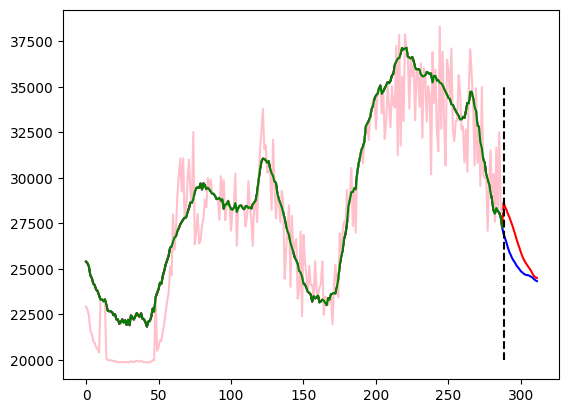

183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
183
1.0
182
2.0
181
3.0
180
4.0
179
5.0
178
6.0
177
7.0
176
8.0
175
9.0
174
10.0
173
11.0
172
12.0
171
13.0
170
14.0
169
15.0
168
16.0
167
17.0
166
18.0
165
19.0
164
20.0
163
21.0
162
22.0
161
23.0
160
24.0
159
25.0
158
26.0
157
27.0
156
28.0
155
29.0
154
30.0
153
31.0
152
32.0
151
33.0
150
34.0
149
35.0
148
36.0
147
37.0
nonzeros: 183
4/4 [==============================] - 0s 12ms/step


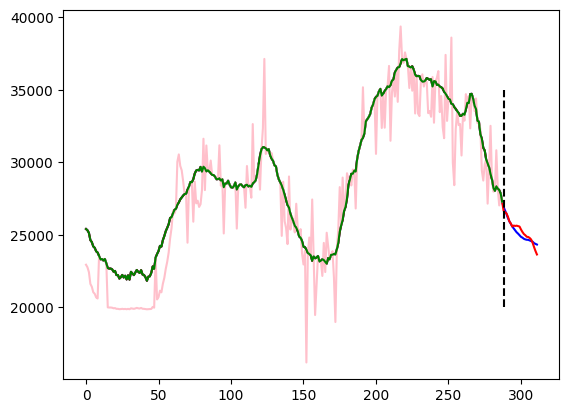

146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
146
1.0
145
2.0
144
3.0
143
4.0
142
5.0
141
6.0
140
7.0
139
8.0
138
9.0
137
10.0
136
11.0
135
12.0
134
13.0
133
14.0
132
15.0
131
16.0
130
17.0
129
18.0
128
19.0
127
20.0
126
21.0
125
22.0
124
23.0
123
24.0
122
25.0
121
26.0
120
27.0
119
28.0
118
29.0
117
30.0
nonzeros: 146
4/4 [==============================] - 0s 12ms/step


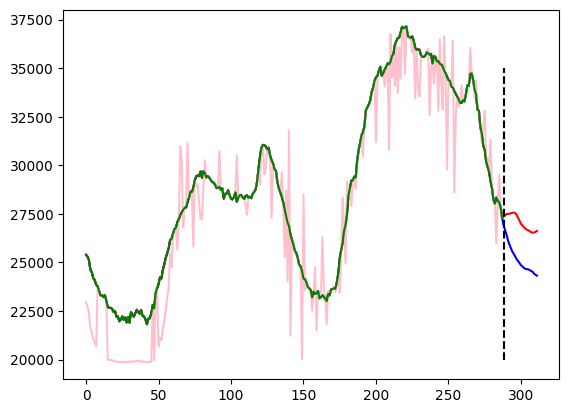

116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
1.0
115
2.0
114
3.0
113
4.0
112
5.0
111
6.0
110
7.0
109
8.0
108
9.0
107
10.0
106
11.0
105
12.0
104
13.0
103
14.0
102
15.0
101
16.0
100
17.0
99
18.0
98
19.0
97
20.0
96
21.0
95
22.0
94
23.0
93
24.0
nonzeros: 116
4/4 [==============================] - 0s 11ms/step


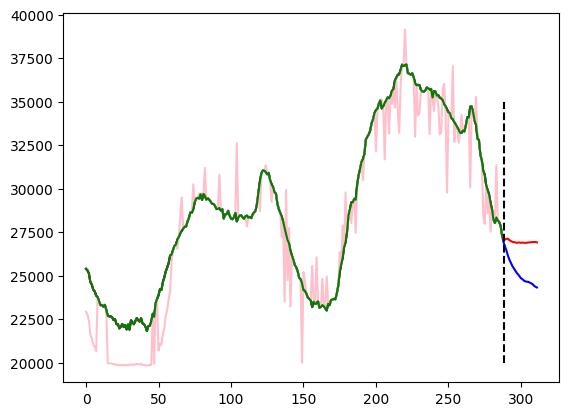

92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
92
1.0
91
2.0
90
3.0
89
4.0
88
5.0
87
6.0
86
7.0
85
8.0
84
9.0
83
10.0
82
11.0
81
12.0
80
13.0
79
14.0
78
15.0
77
16.0
76
17.0
75
18.0
74
19.0
nonzeros: 92
4/4 [==============================] - 0s 12ms/step


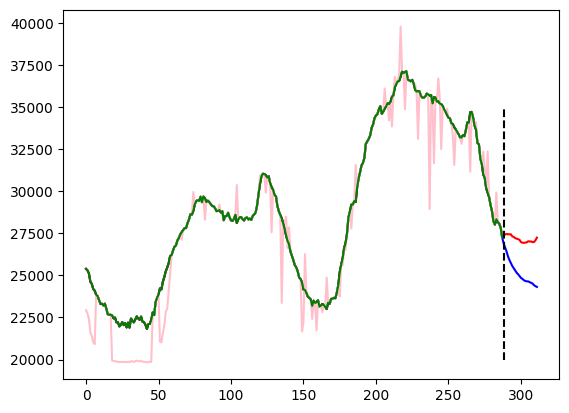

73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
1.0
72
2.0
71
3.0
70
4.0
69
5.0
68
6.0
67
7.0
66
8.0
65
9.0
64
10.0
63
11.0
62
12.0
61
13.0
60
14.0
59
15.0
nonzeros: 73
4/4 [==============================] - 0s 12ms/step


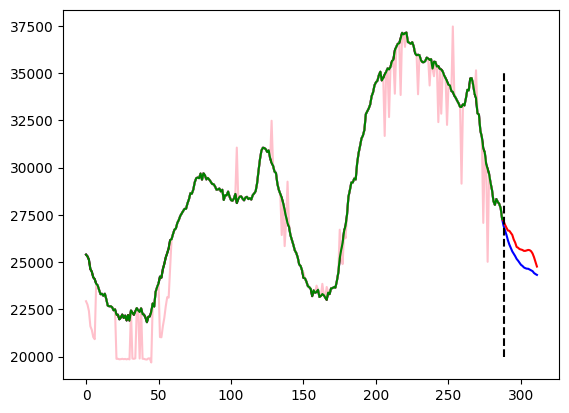

58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
1.0
57
2.0
56
3.0
55
4.0
54
5.0
53
6.0
52
7.0
51
8.0
50
9.0
49
10.0
48
11.0
47
12.0
nonzeros: 58
4/4 [==============================] - 0s 11ms/step


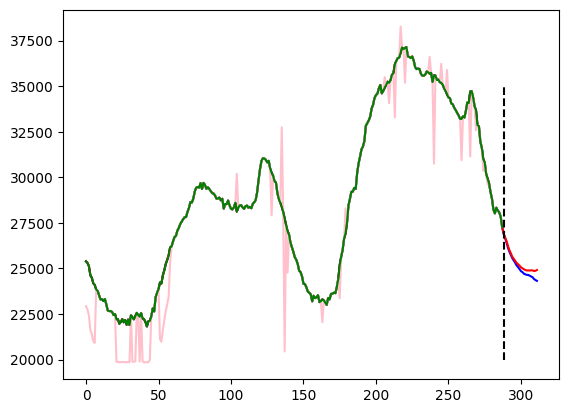

46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
1.0
45
2.0
44
3.0
43
4.0
42
5.0
41
6.0
40
7.0
39
8.0
38
9.0
37
10.0
nonzeros: 46
4/4 [==============================] - 0s 12ms/step


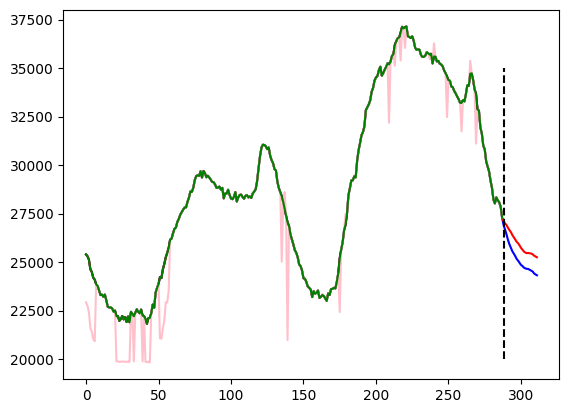

36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
1.0
35
2.0
34
3.0
33
4.0
32
5.0
31
6.0
30
7.0
29
8.0
nonzeros: 36
4/4 [==============================] - 0s 12ms/step


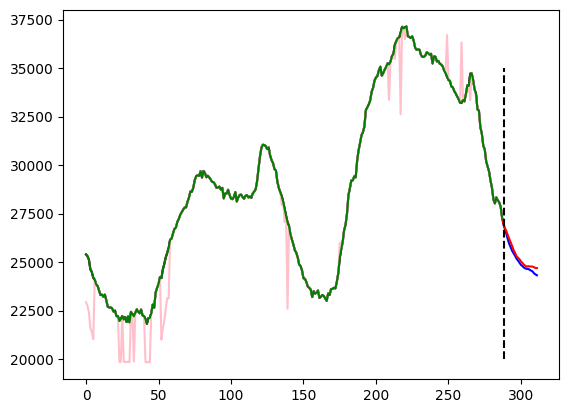

28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
1.0
27
2.0
26
3.0
25
4.0
24
5.0
23
6.0
nonzeros: 28
4/4 [==============================] - 0s 11ms/step


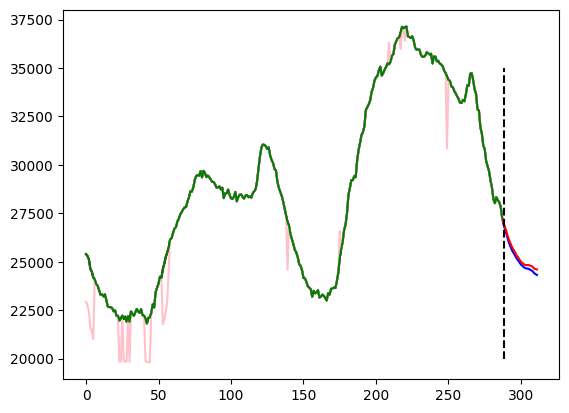

22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
1.0
21
2.0
20
3.0
19
4.0
18
5.0
nonzeros: 22
4/4 [==============================] - 0s 11ms/step


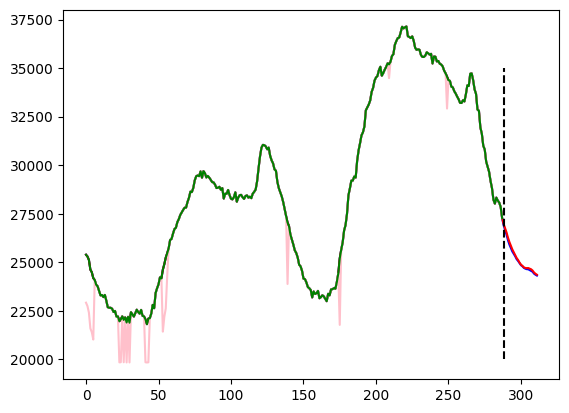

17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
1.0
16
2.0
15
3.0
14
4.0
nonzeros: 17
4/4 [==============================] - 0s 12ms/step


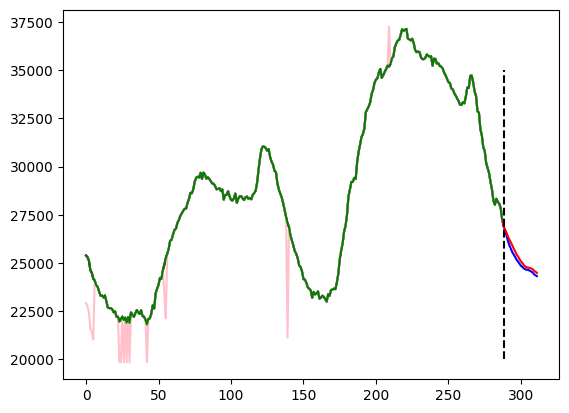

13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
1.0
12
2.0
11
3.0
nonzeros: 13
4/4 [==============================] - 0s 13ms/step


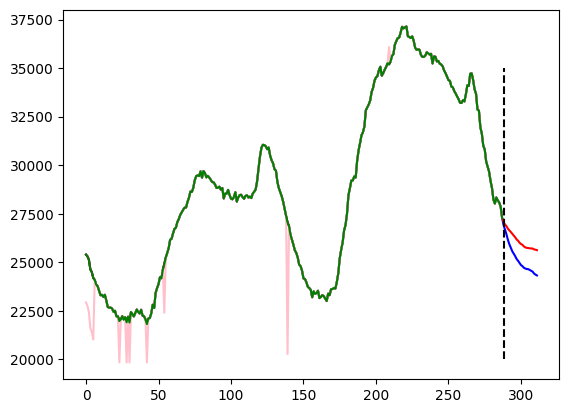

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
1.0
9
2.0
8
3.0
nonzeros: 10
4/4 [==============================] - 0s 12ms/step


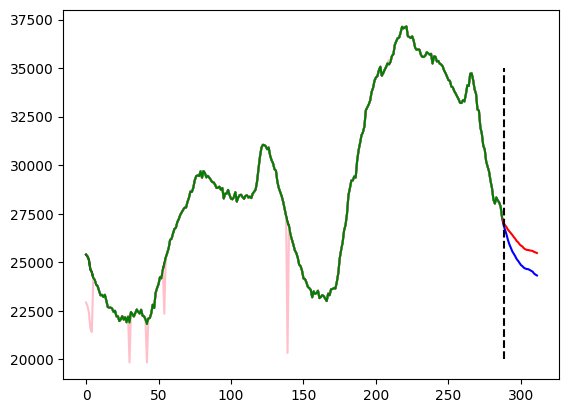

7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
1.0
6
2.0
nonzeros: 7
4/4 [==============================] - 0s 12ms/step


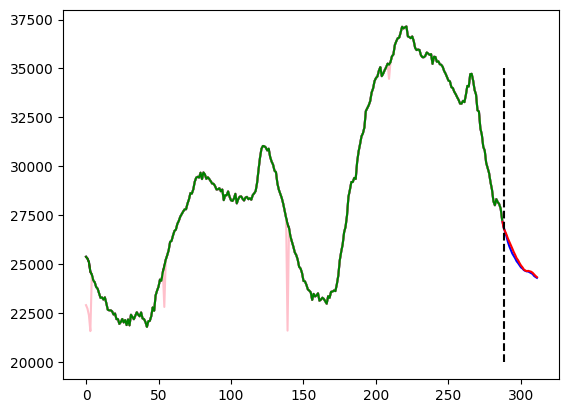

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
1.0
4
2.0
nonzeros: 5
4/4 [==============================] - 0s 12ms/step


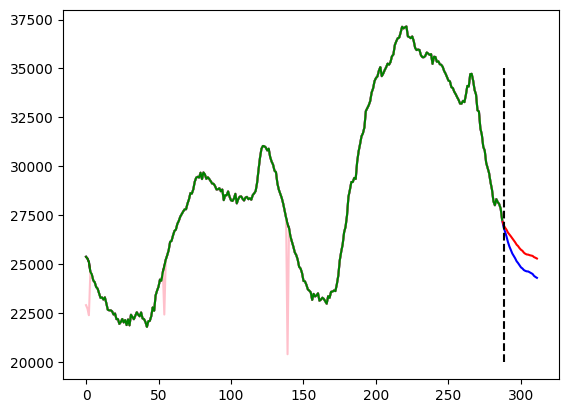

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1.0
nonzeros: 3
4/4 [==============================] - 0s 13ms/step


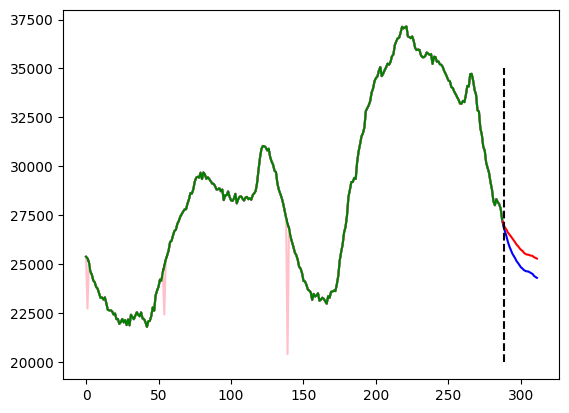

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1.0
nonzeros: 2
4/4 [==============================] - 0s 12ms/step


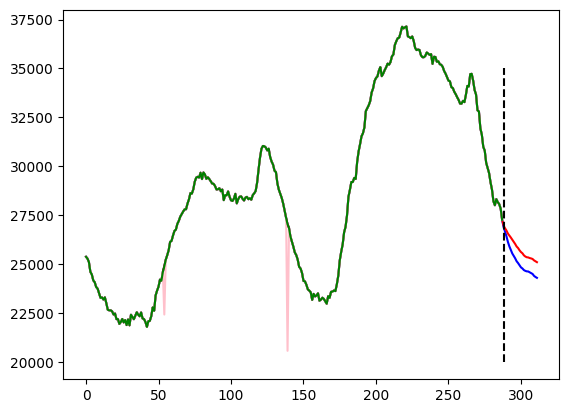

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1.0
nonzeros: 1
4/4 [==============================] - 0s 11ms/step


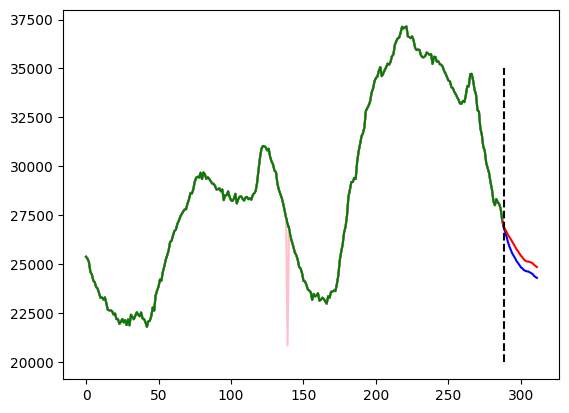

In [47]:
def l2_attack_for_l0_attack(x,y,m,mask,iterations=100, const=6, lr=.03):
    pert = tf.Variable(tf.zeros_like(x))
    adv_input = tf.Variable(tf.zeros_like(x))
    optimizer = tf.keras.optimizers.Adam(lr)
    for i in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(pert)
            adv_input = adv_input + pert * mask
            # Forward pass to get the model's prediction on the adversarial input
            prediction = m(adv_input)
            # Calculate the loss between the true label and the model's prediction
            loss = loss_fn(x,adv_input, y,prediction, const)
            grads = tape.gradient(loss, pert)
            optimizer.apply_gradients([(grads, pert)])
    return pert, grads


ITER = 20
adv_l0 = tf.Variable(initial_value=x)
mask = np.ones(x.shape)
clean_preds = m.predict(x)
for i in range(ITER):

    pert, grads = l2_attack_for_l0_attack(x,y,m,mask)
    
    total_abs_change = tf.math.abs(pert*grads)
    count= np.zeros(x.shape[0])
    
    #for k in range(mask.shape[0]):
    for k in range(1):
        
        for idx, j in enumerate(np.argsort(total_abs_change[k,:,0],-1)):
            non_zero = np.count_nonzero(mask[k])
            print(non_zero)
            if mask[k,j] != 0:
                count[k] += 1
                print(count[k])
                mask[k,j] = 0
            if count[k]>0.25*non_zero: break
        #print('mask non zeros',np.count_nonzero(mask))
    #print(m(x + pert))
    #return adv_l0, grads, delta, total_abs_change, mask
    print('nonzeros:',np.count_nonzero(pert[0]))
    adv_input = x+pert
    adv_preds = m.predict(adv_input)
    
    plot_forecast(x,clean_preds,adv_preds,i=0, aa=adv_input)
    plt.show()

In [ ]:
2 (tanh(w))

1703948733.020631
4/4 [==============================] - 0s 12ms/step
nonzeros: 288
4/4 [==============================] - 0s 12ms/step


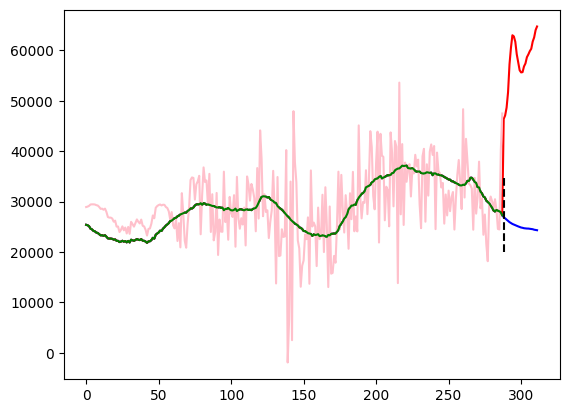

nonzeros: 230
4/4 [==============================] - 0s 11ms/step


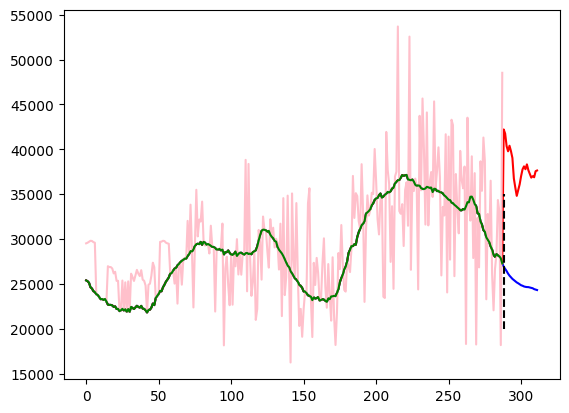

nonzeros: 184
4/4 [==============================] - 0s 12ms/step


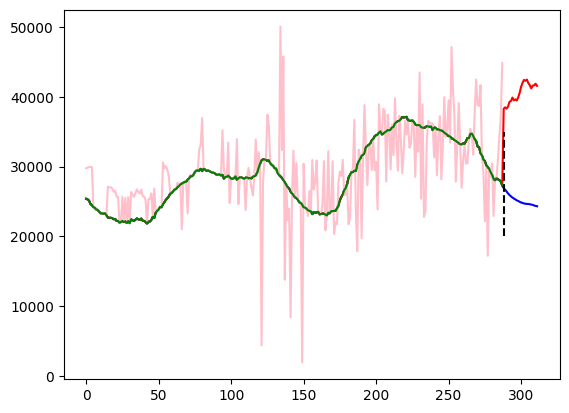

nonzeros: 147
4/4 [==============================] - 0s 11ms/step


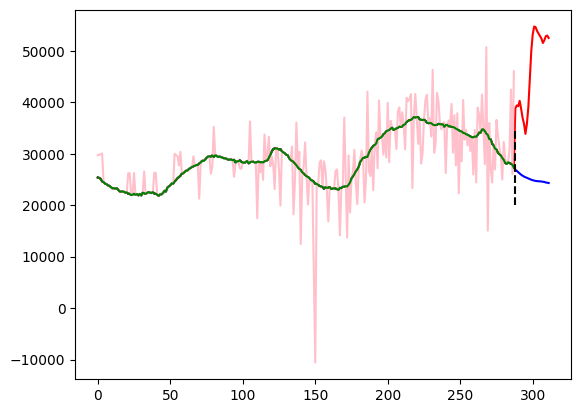

nonzeros: 117
4/4 [==============================] - 0s 12ms/step


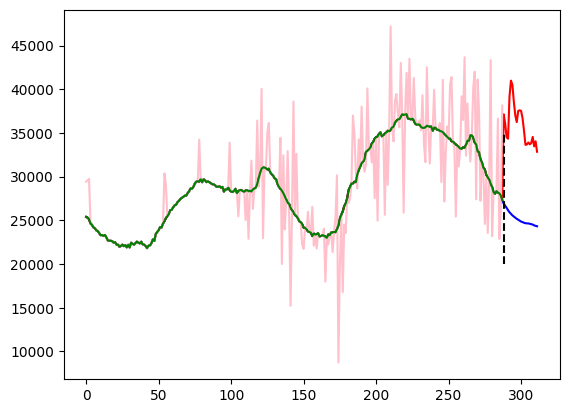

nonzeros: 93
4/4 [==============================] - 0s 12ms/step


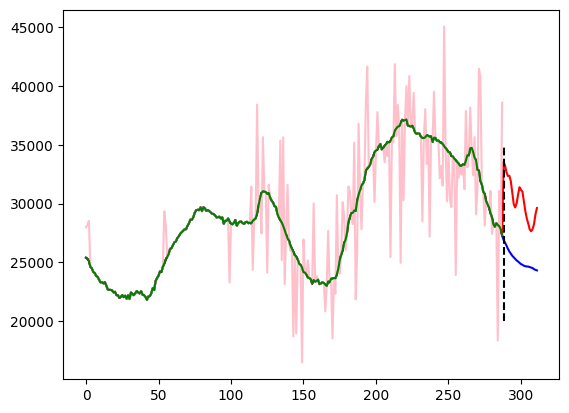

nonzeros: 74
4/4 [==============================] - 0s 12ms/step


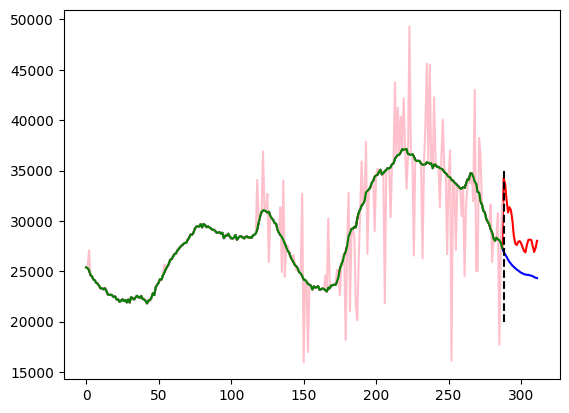

nonzeros: 59
4/4 [==============================] - 0s 12ms/step


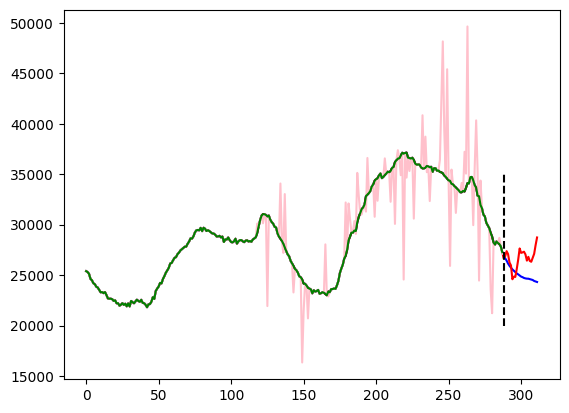

nonzeros: 47
4/4 [==============================] - 0s 11ms/step


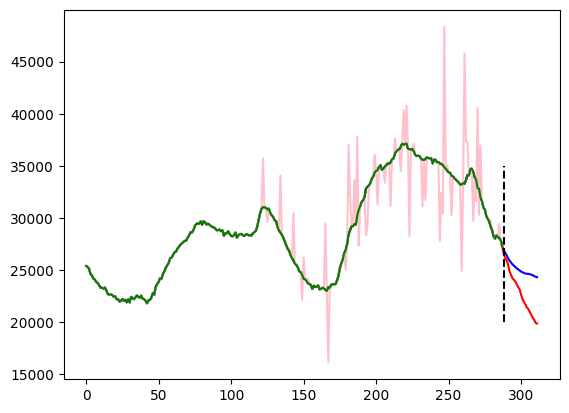

nonzeros: 37
4/4 [==============================] - 0s 12ms/step


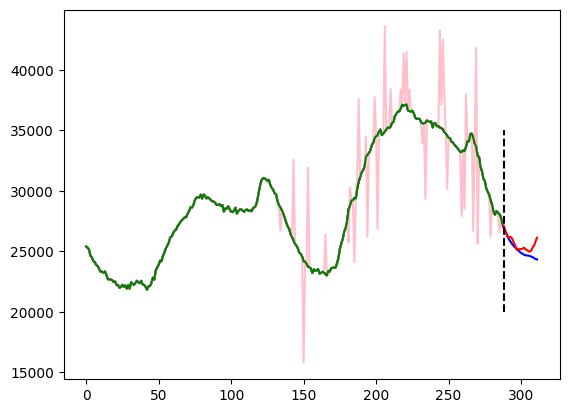

nonzeros: 29
4/4 [==============================] - 0s 12ms/step


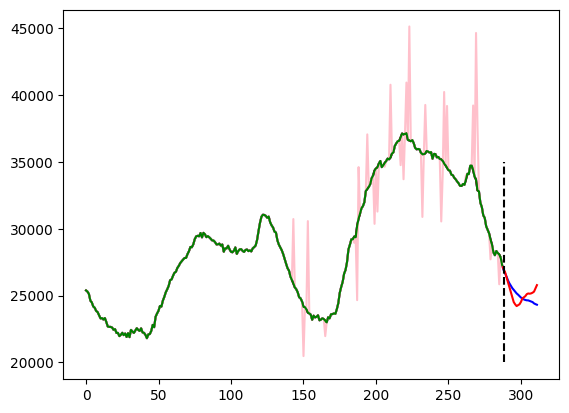

nonzeros: 23
4/4 [==============================] - 0s 12ms/step


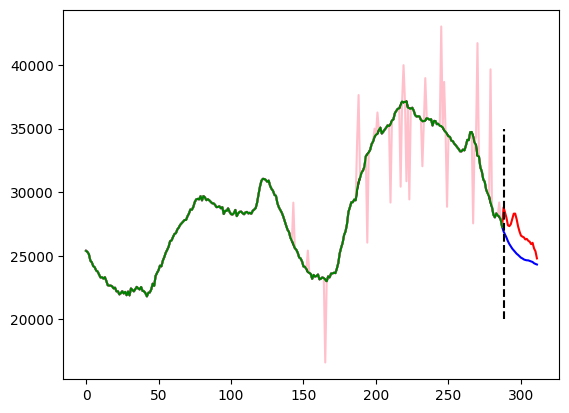

nonzeros: 18
4/4 [==============================] - 0s 12ms/step


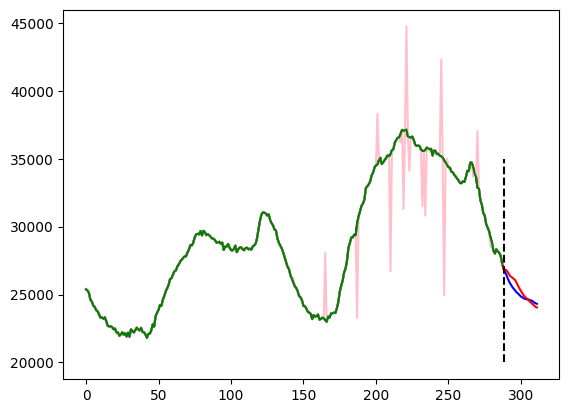

nonzeros: 14
4/4 [==============================] - 0s 12ms/step


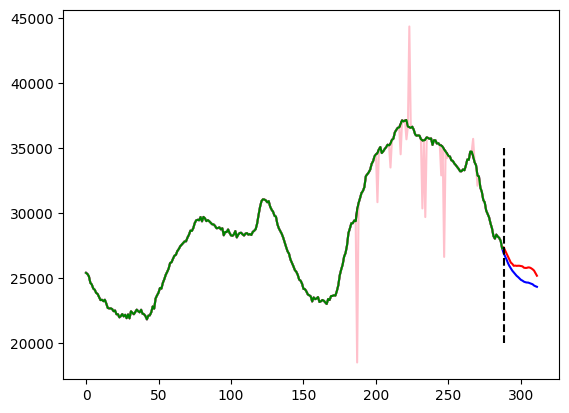

nonzeros: 11
4/4 [==============================] - 0s 10ms/step


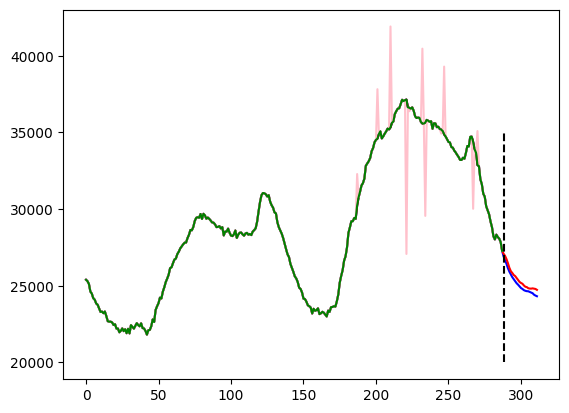

nonzeros: 8
4/4 [==============================] - 0s 12ms/step


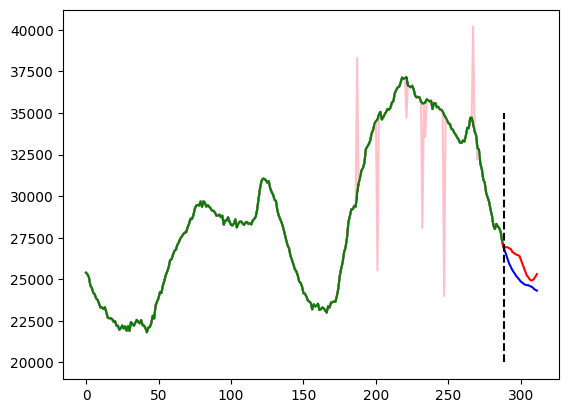

nonzeros: 6
4/4 [==============================] - 0s 11ms/step


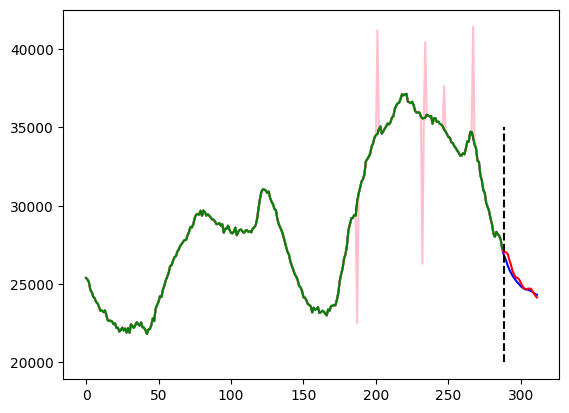

nonzeros: 4
4/4 [==============================] - 0s 11ms/step


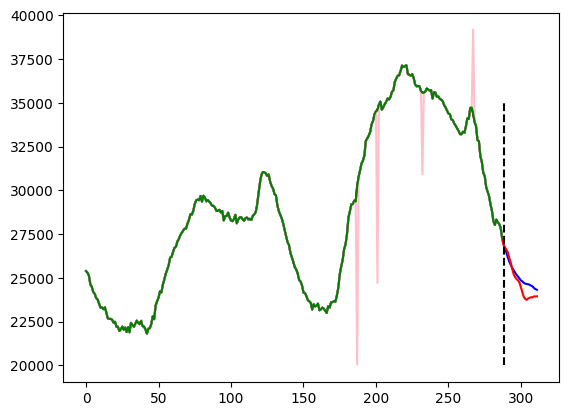

nonzeros: 3
4/4 [==============================] - 0s 11ms/step


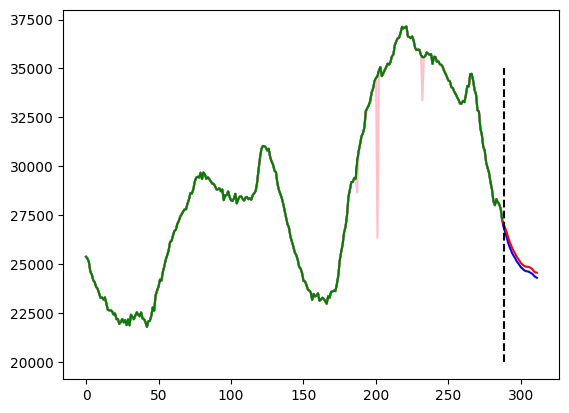

nonzeros: 2
4/4 [==============================] - 0s 11ms/step


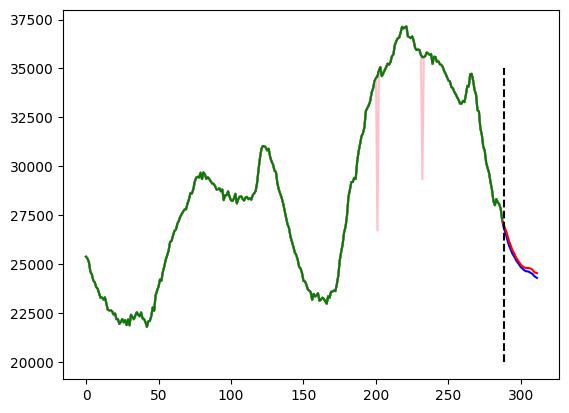

nonzeros: 1
4/4 [==============================] - 0s 12ms/step


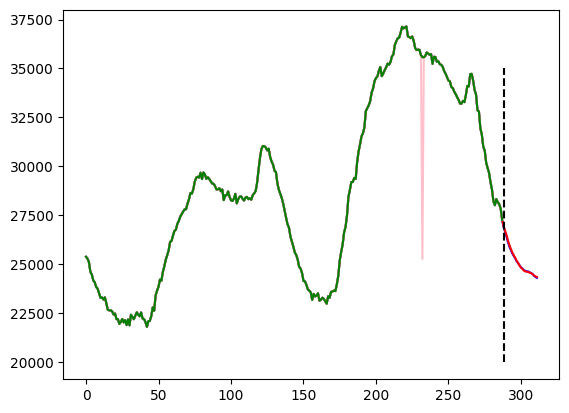

nonzeros: 1
4/4 [==============================] - 0s 12ms/step


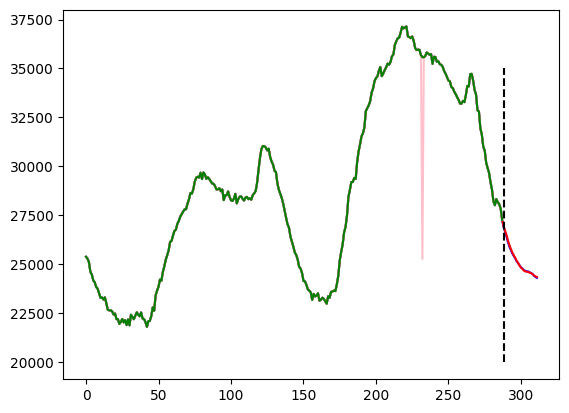

nonzeros: 1
4/4 [==============================] - 0s 12ms/step


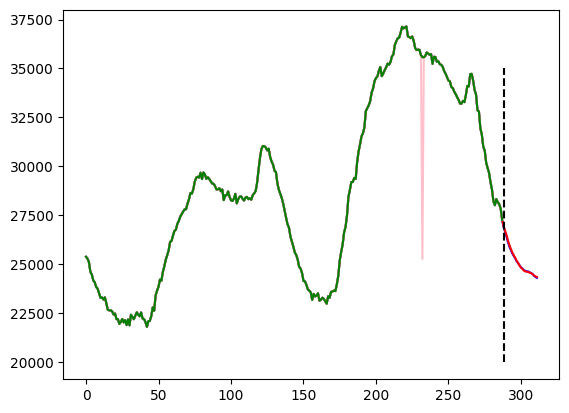

nonzeros: 1
4/4 [==============================] - 0s 11ms/step


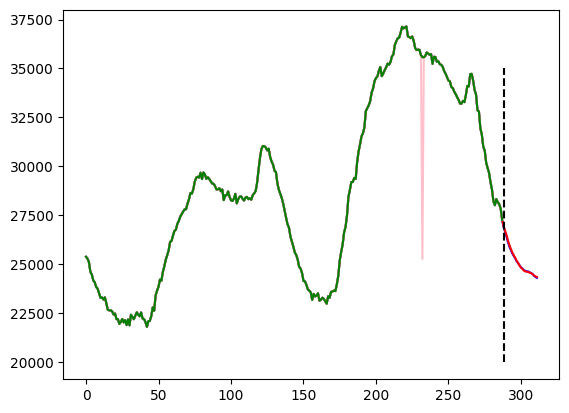

nonzeros: 1
4/4 [==============================] - 0s 11ms/step


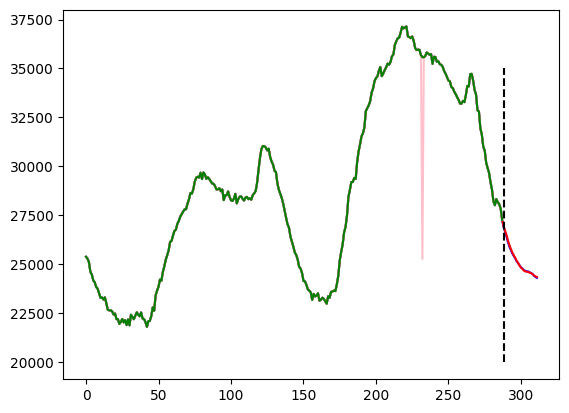

nonzeros: 1
4/4 [==============================] - 0s 12ms/step


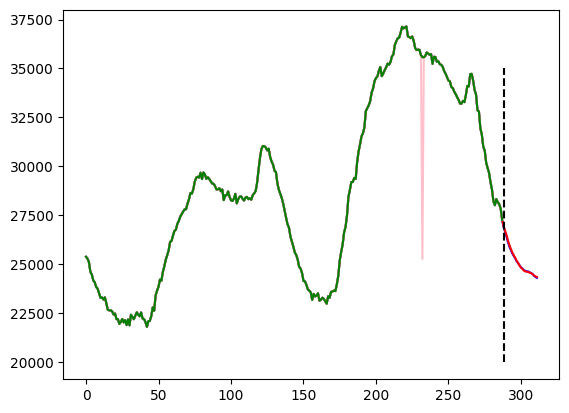

nonzeros: 1
4/4 [==============================] - 0s 12ms/step


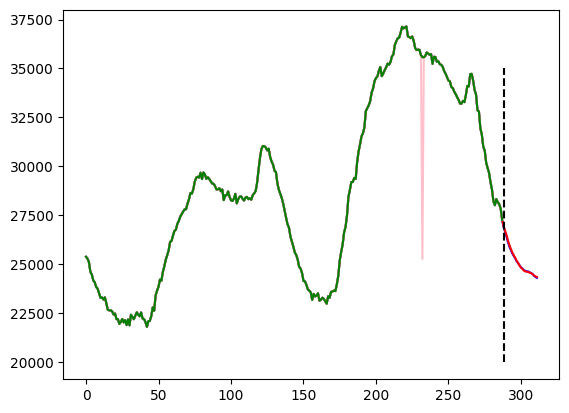

nonzeros: 1
4/4 [==============================] - 0s 12ms/step


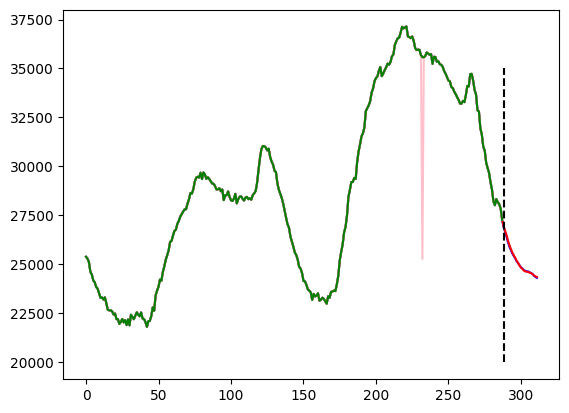

nonzeros: 1
4/4 [==============================] - 0s 12ms/step


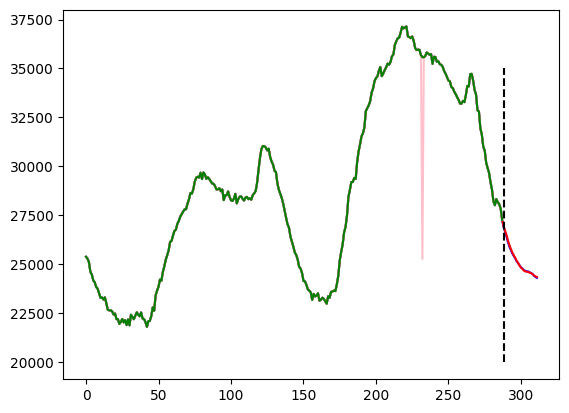

nonzeros: 1
4/4 [==============================] - 0s 12ms/step


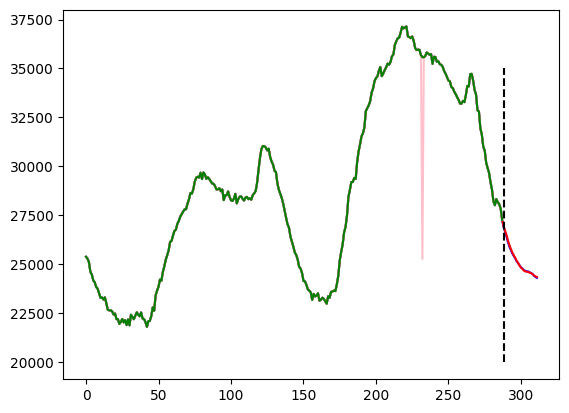

nonzeros: 1
4/4 [==============================] - 0s 12ms/step


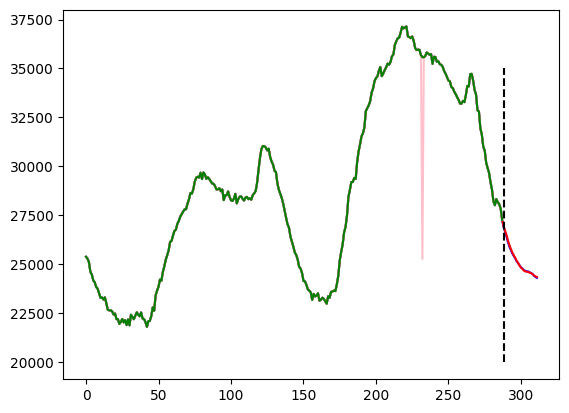

nonzeros: 1
4/4 [==============================] - 0s 12ms/step


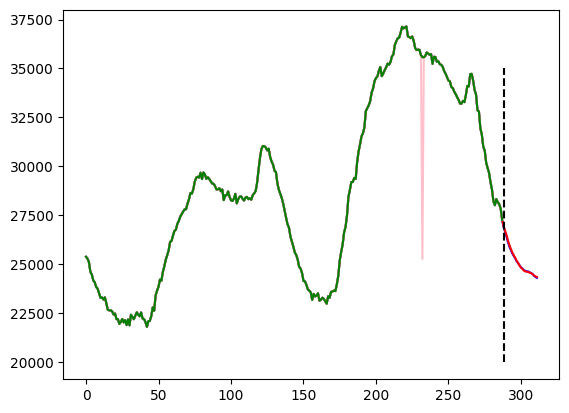

nonzeros: 1
4/4 [==============================] - 0s 13ms/step


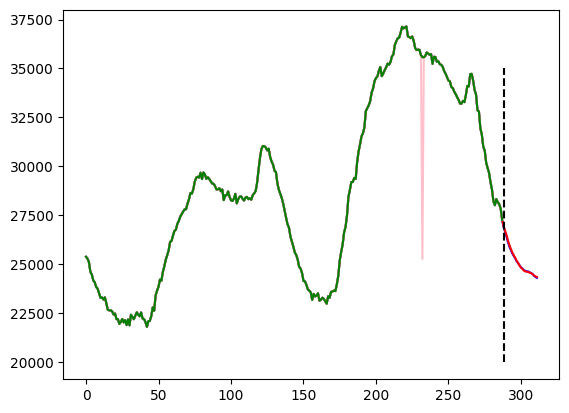

nonzeros: 1
4/4 [==============================] - 0s 12ms/step


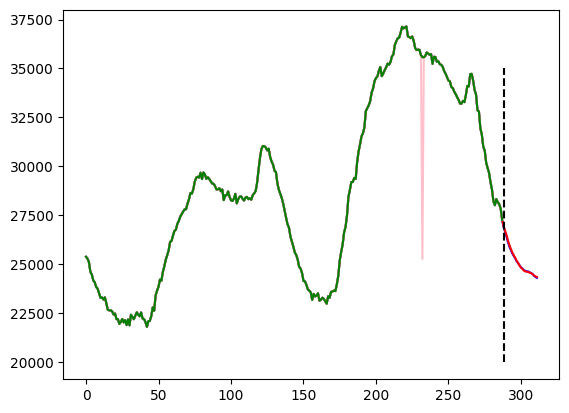

nonzeros: 1
4/4 [==============================] - 0s 12ms/step


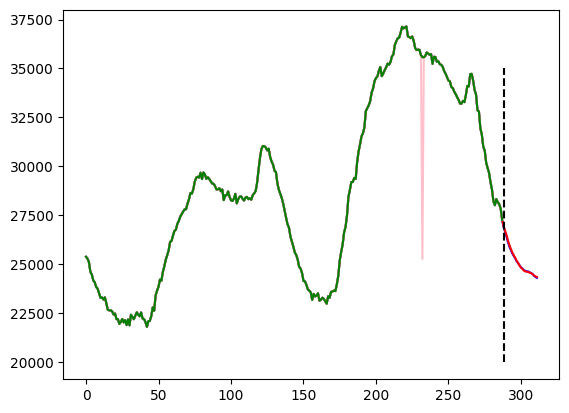

nonzeros: 1
4/4 [==============================] - 0s 12ms/step


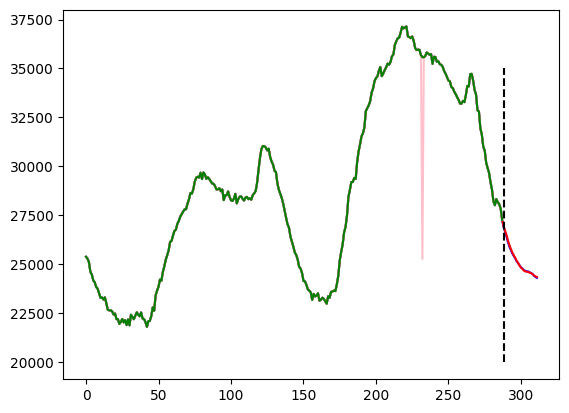

nonzeros: 1
4/4 [==============================] - 0s 11ms/step


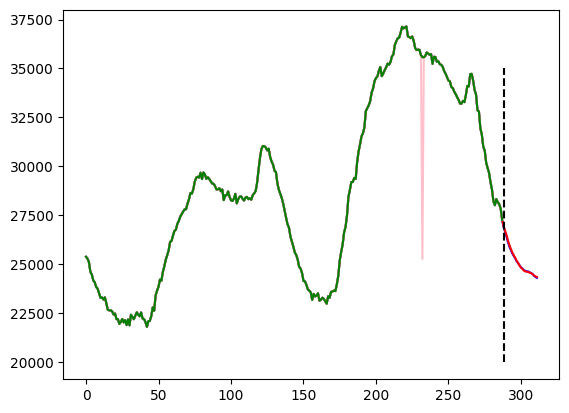

nonzeros: 1
4/4 [==============================] - 0s 11ms/step


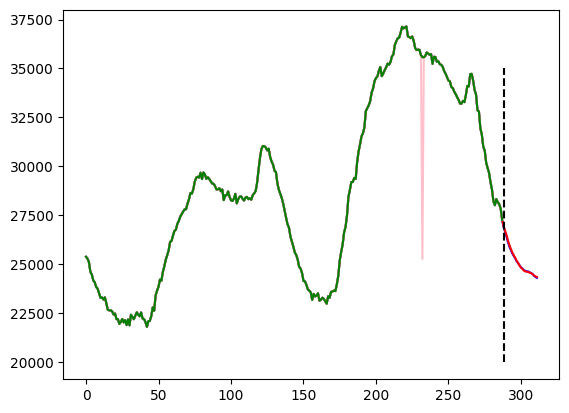

nonzeros: 1
4/4 [==============================] - 0s 11ms/step


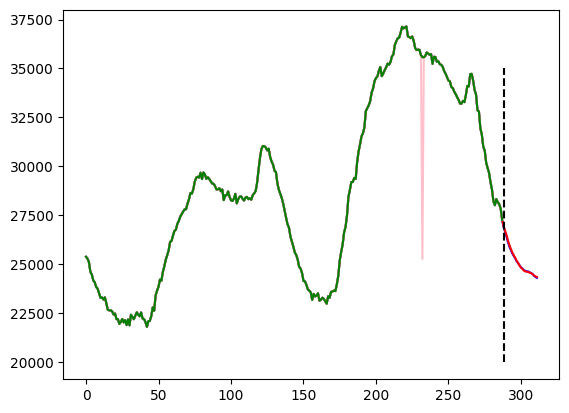

nonzeros: 1
4/4 [==============================] - 0s 11ms/step


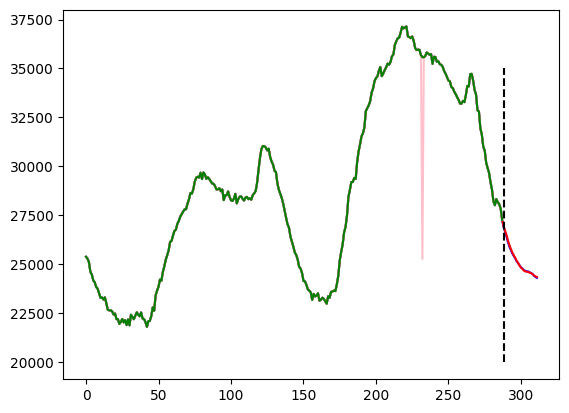

2132.3828094005585


In [80]:
def l2_attack_for_l0_attack(x,y,m,mask,iterations=100, const=6, lr=.03):
    pert = tf.Variable(tf.zeros_like(x))
    adv_input = tf.Variable(tf.zeros_like(x))
    optimizer = tf.keras.optimizers.Adam(lr)
    for i in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(pert)
            adv_input = adv_input + pert * mask
            # Forward pass to get the model's prediction on the adversarial input
            prediction = m(adv_input)
            # Calculate the loss between the true label and the model's prediction
            loss = loss_fn(x,adv_input, y,prediction, const)
            grads = tape.gradient(loss, pert)
            optimizer.apply_gradients([(grads, pert)])
    return pert, grads

def l0_attack(x,y,m,ITER = 23):

    t0 = time.time()
    print(t0)
    adv_l0 = tf.Variable(initial_value=x)
    mask = np.ones_like(x)
    clean_preds = m.predict(x)
    for i in range(ITER):
        pert, grads = l2_attack_for_l0_attack(x, y, m, mask, iterations=500)
    
        total_abs_change = tf.math.abs(pert * grads)
        non_zeros = np.count_nonzero(mask, axis=1)
    
        # Sort indices along the last axis
        sorted_indices = np.argsort(total_abs_change, axis=1)
    
        count = np.zeros_like(non_zeros)
    
        for k in range(mask.shape[0]):
            idx = sorted_indices[k][:-int(non_zeros[k]*.8)]
            non_zero = non_zeros[k]
    
            # Find the indices where mask[k, j] is non-zero
            non_zero_indices = np.where(mask[k, idx] != 0)[0]
    
            # Update count and mask
            count[k] += len(non_zero_indices)
            mask[k, idx[non_zero_indices]] = 0
        
        print('nonzeros:',np.count_nonzero(pert[0]))
        adv_input = x + pert
        adv_preds = m.predict(adv_input)
    
        plot_forecast(x, clean_preds, adv_preds, i=0, aa=adv_input)
        plt.show()
    print(time.time()-t0)
    return pert

In [158]:
adv_input, _ = l2_attack_for_l0_attack(x,y,m,mask)
adv_preds = m.predict(adv_input)
clean_preds = m.predict(x)

4/4 [==============================] - 0s 11ms/step


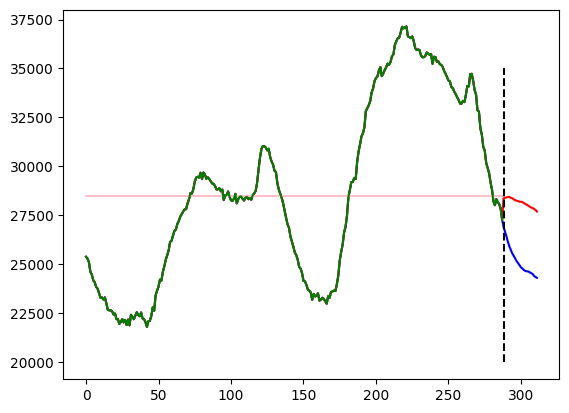

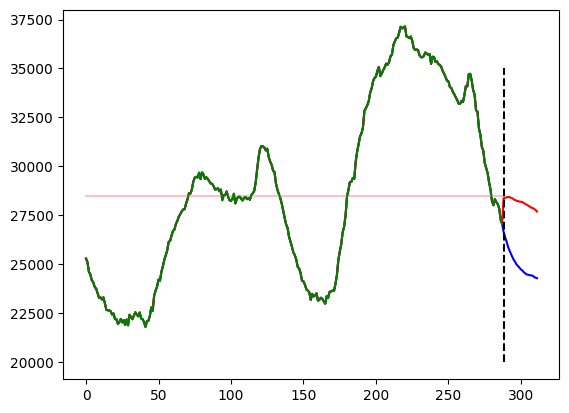

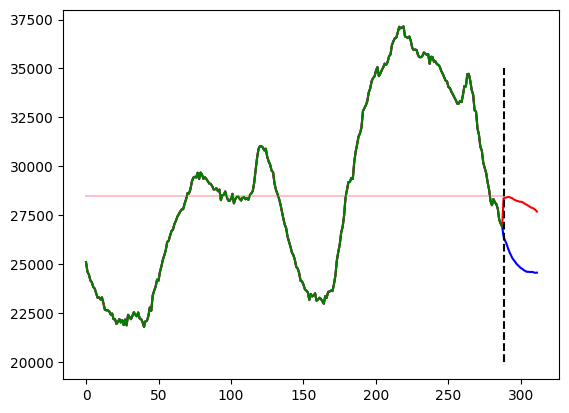

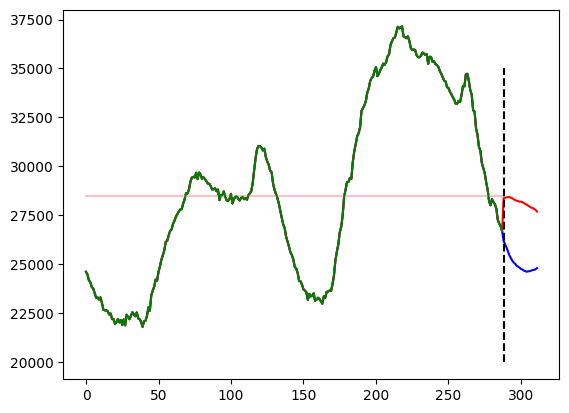

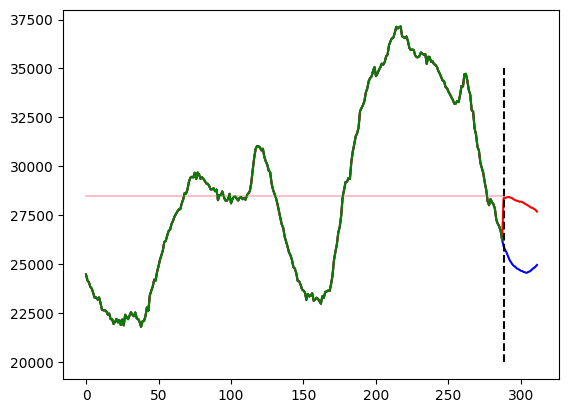

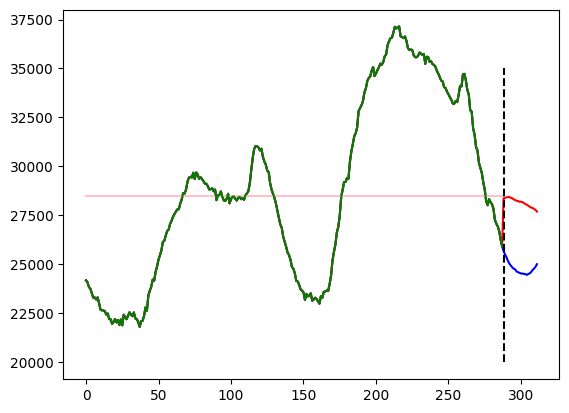

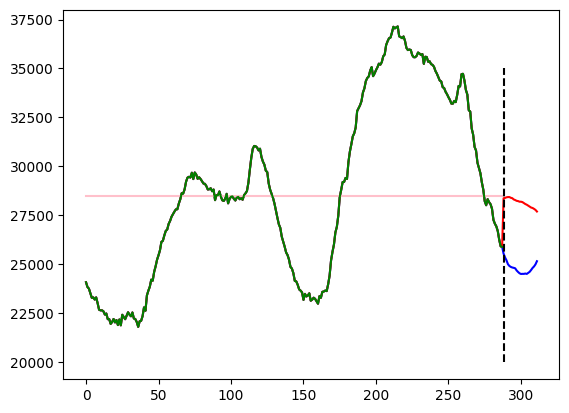

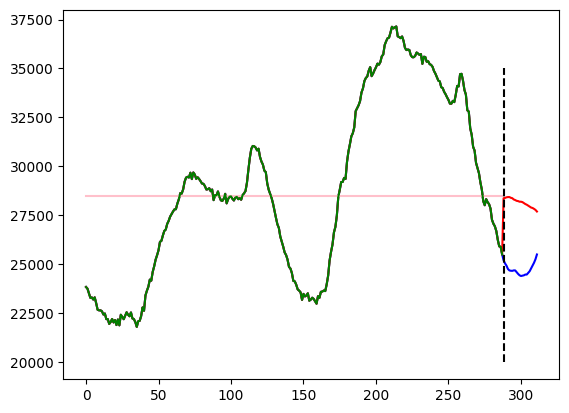

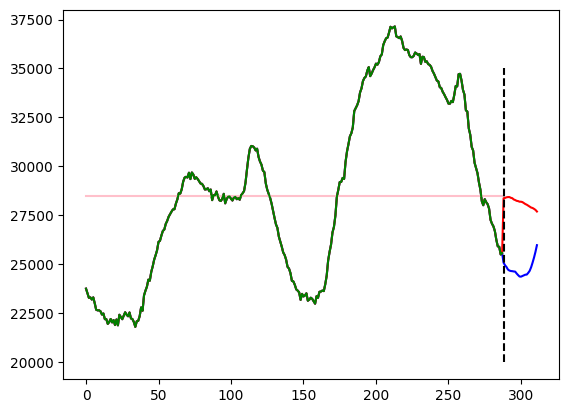

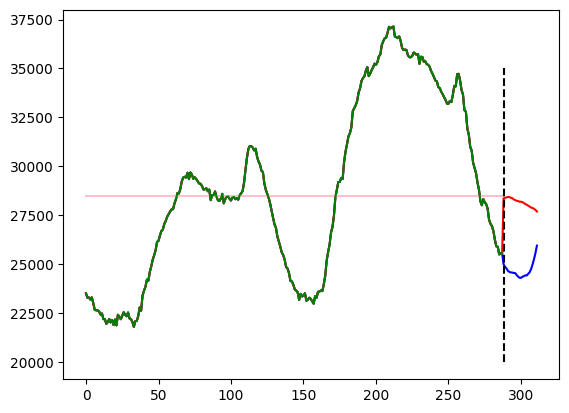

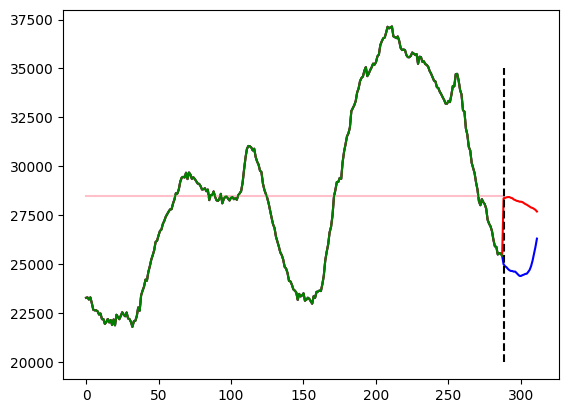

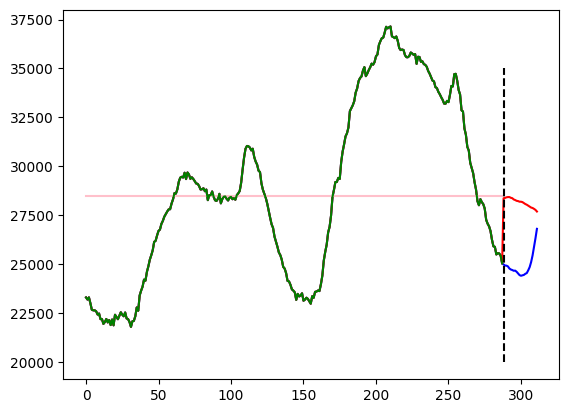

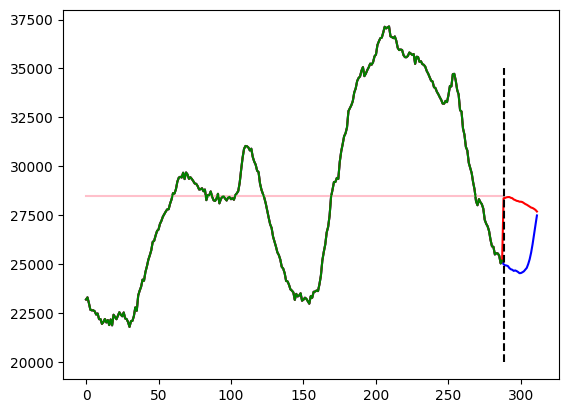

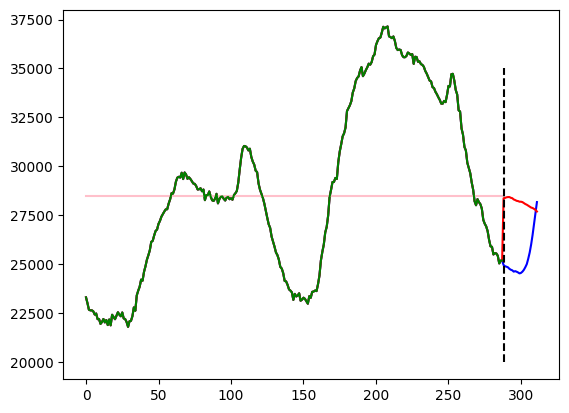

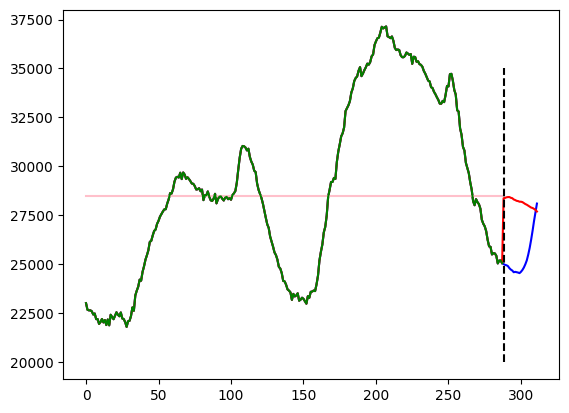

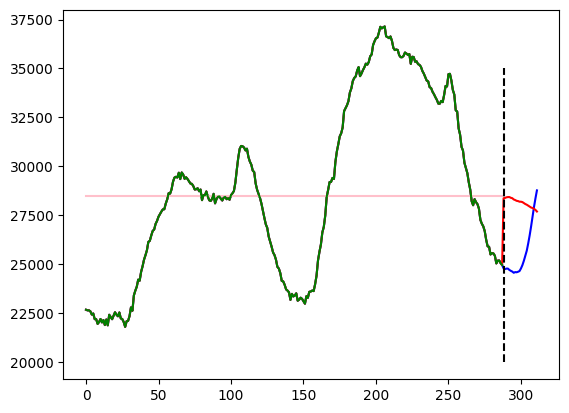

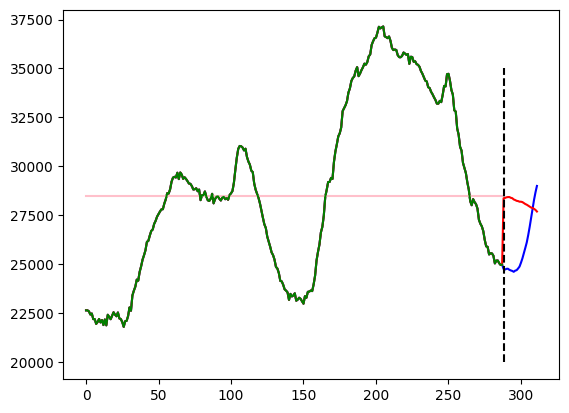

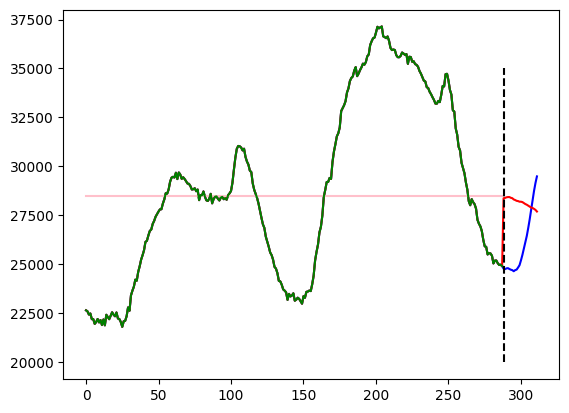

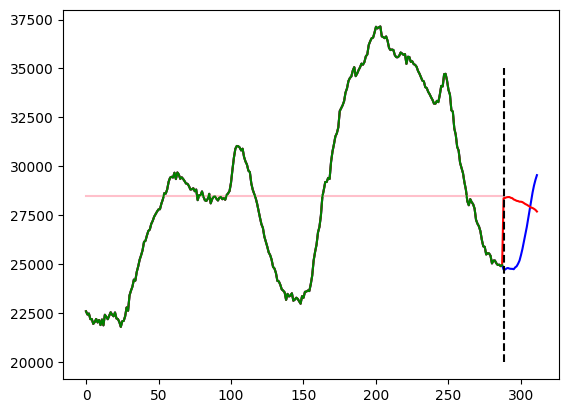

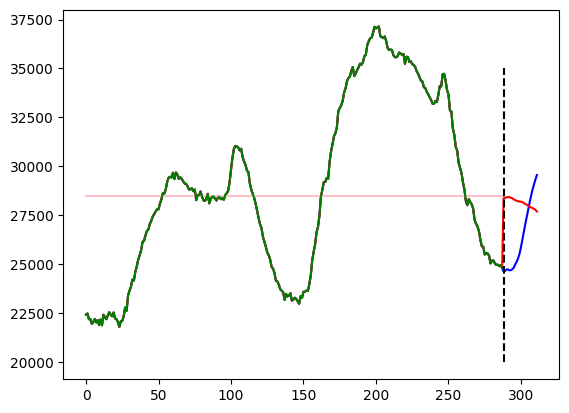

In [159]:
for i in range(20):
    plot_forecast(x,clean_preds,adv_preds,i=i, aa=adv_input)
    plt.show()

In [160]:
adv_input[0][0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

In [83]:
np.save('test_save_delete.npy', adv_input.numpy())


In [86]:
y_hat_adv = m.predict(adv_input)
y_hat = m.predict(x)
denormalized_y_hat_adv = normalization.denormalize(y_hat_adv, norm_params)
denormalized_y_hat = normalization.denormalize(y_hat, norm_params)

4/4 [==============================] - 0s 11ms/step


In [96]:
tf.keras.losses.mean_absolute_error(denormalized_y_hat_adv,denormalized_y_hat)

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([3.45054512e+01, 1.10808838e+02, 1.60047400e+03, 2.63007721e+02,
       4.88955879e+01, 4.89500313e+01, 4.02205963e+02, 1.74311523e+01,
       4.02866211e+01, 2.61177643e+02, 2.14641933e+01, 2.68041172e+01,
       1.00010094e+02, 9.38064804e+01, 9.03610001e+01, 1.13774414e+01,
       1.45404953e+02, 1.27092615e+03, 2.59209717e+02, 9.30461182e+02,
       4.18301582e+01, 1.67889746e+03, 2.63771973e+01, 6.98738586e+02,
       2.82513336e+02, 2.54847412e+02, 1.40502551e+03, 9.64449844e+01,
       2.84673340e+02, 7.17651367e+00, 3.53055084e+02, 2.04777023e+02,
       3.06926849e+02, 4.35053564e+03, 2.20965500e+02, 6.86844910e+02,
       4.55322266e+00, 1.14878137e+03, 4.13503510e+02, 1.12113391e+03,
       3.37240410e+01, 4.78115570e+02, 3.10872406e-01, 1.07538660e+03,
       8.31800156e+01, 1.20121260e+01, 1.03225159e+03, 2.95058398e+03,
       1.19181480e+02, 5.37727852e+01, 4.25942188e+03, 1.51969495e+03,
       5.16538086e+02, 2.6706

In [100]:
tf.reduce_sum(tf.abs(denormalized_y_hat_adv-denormalized_y_hat), -1)/24

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([3.45054512e+01, 1.10808838e+02, 1.60047400e+03, 2.63007721e+02,
       4.88955879e+01, 4.89500313e+01, 4.02205963e+02, 1.74311523e+01,
       4.02866211e+01, 2.61177643e+02, 2.14641933e+01, 2.68041172e+01,
       1.00010094e+02, 9.38064804e+01, 9.03610001e+01, 1.13774414e+01,
       1.45404953e+02, 1.27092615e+03, 2.59209717e+02, 9.30461182e+02,
       4.18301582e+01, 1.67889746e+03, 2.63771973e+01, 6.98738586e+02,
       2.82513336e+02, 2.54847412e+02, 1.40502551e+03, 9.64449844e+01,
       2.84673340e+02, 7.17651367e+00, 3.53055084e+02, 2.04777023e+02,
       3.06926849e+02, 4.35053564e+03, 2.20965500e+02, 6.86844910e+02,
       4.55322266e+00, 1.14878137e+03, 4.13503510e+02, 1.12113391e+03,
       3.37240410e+01, 4.78115570e+02, 3.10872406e-01, 1.07538660e+03,
       8.31800156e+01, 1.20121260e+01, 1.03225159e+03, 2.95058398e+03,
       1.19181480e+02, 5.37727852e+01, 4.25942188e+03, 1.51969495e+03,
       5.16538086e+02, 2.6706